# Results Overview  

Using the trained multimodal model, we analyze how politicians are visually framed across partisan outlets.

### Figure 10. Visual Slant Distributions Across Partisan Outlets  

Figure 10 compares the distribution of visual slant for Republican and Democratic politicians across partisan outlets.  
The left panel shows how Republican politicians are represented in Democratic versus Republican outlets, while the right panel shows the reverse for Democratic politicians. Kernel density estimates illustrate systematic polarization: politicians tend to appear more visually favorable in aligned outlets, with means and interquartile ranges shifting across party lines.

/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

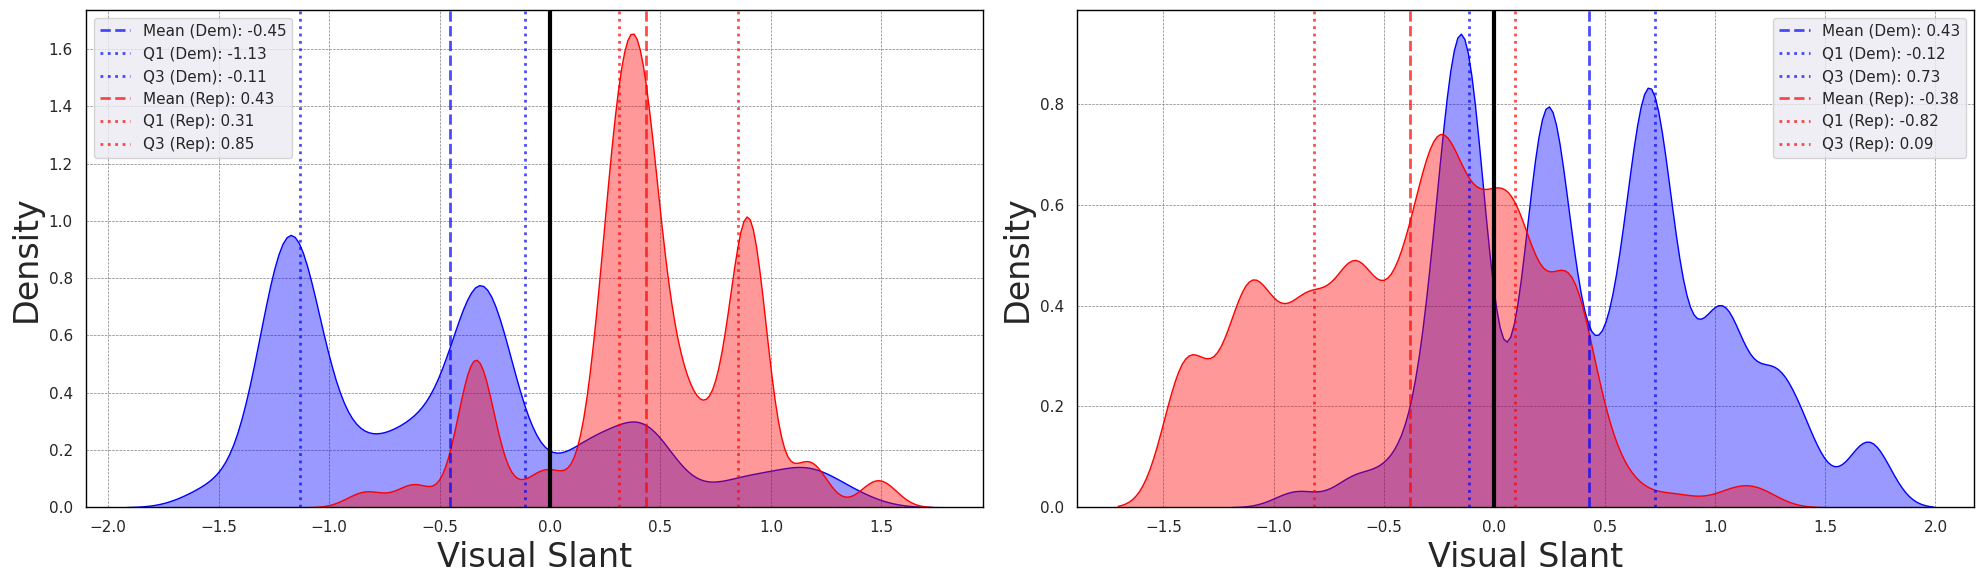

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/Final_CSV_For_Analysis.csv')

plt.style.use('default')
sns.set_style("white")

news_center_affiliations = {
    'www.nytimes.com': 'Democratic', 'www.washingtonpost.com': 'Democratic',
    'www.cnn.com': 'Democratic', 'www.dailymail.co.uk': 'Republican',
    'www.foxnews.com': 'Republican', 'www.newsmax.com': 'Republican'
}

selected_news_centers = [news for news, affiliation in news_center_affiliations.items() if affiliation in ['Democratic', 'Republican']]
df = df[df['News Center'].isin(selected_news_centers)]
binsss = 20

democratic_news_centers = [news for news, affiliation in news_center_affiliations.items() if affiliation == 'Democratic']
republican_news_centers = [news for news, affiliation in news_center_affiliations.items() if affiliation == 'Republican']

republican_politicians_in_democratic_outlets = pd.Series(dtype='float64')
republican_politicians_in_republican_outlets = pd.Series(dtype='float64')

for news_center in democratic_news_centers:
    column_name = f"Final_Ratio_{news_center}"
    if column_name in df.columns:
        republican_data = df[(df['Real Person Side'] == 'Republican')][column_name]
        republican_politicians_in_democratic_outlets = pd.concat([republican_politicians_in_democratic_outlets, republican_data])

for news_center in republican_news_centers:
    column_name = f"Final_Ratio_{news_center}"
    if column_name in df.columns:
        republican_data = df[(df['Real Person Side'] == 'Republican')][column_name]
        republican_politicians_in_republican_outlets = pd.concat([republican_politicians_in_republican_outlets, republican_data])

democratic_politicians_in_democratic_outlets = pd.Series(dtype='float64')
democratic_politicians_in_republican_outlets = pd.Series(dtype='float64')

for news_center in democratic_news_centers:
    column_name = f"Final_Ratio_{news_center}"
    if column_name in df.columns:
        democratic_data = df[(df['Real Person Side'] == 'Democratic')][column_name]
        democratic_politicians_in_democratic_outlets = pd.concat([democratic_politicians_in_democratic_outlets, democratic_data])

for news_center in republican_news_centers:
    column_name = f"Final_Ratio_{news_center}"
    if column_name in df.columns:
        democratic_data = df[(df['Real Person Side'] == 'Democratic')][column_name]
        democratic_politicians_in_republican_outlets = pd.concat([democratic_politicians_in_republican_outlets, democratic_data])

sns.set_theme(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.set_facecolor('white')
ax2.set_facecolor('white')

for spine in ax1.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

for spine in ax2.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

sns.kdeplot(republican_politicians_in_democratic_outlets, ax=ax1, fill=True, color='blue', alpha=0.4)
sns.kdeplot(republican_politicians_in_republican_outlets, ax=ax1, fill=True, color='red', alpha=0.4)

mean_rep_in_dem = republican_politicians_in_democratic_outlets.mean()
q1_rep_in_dem = republican_politicians_in_democratic_outlets.quantile(0.25)
q3_rep_in_dem = republican_politicians_in_democratic_outlets.quantile(0.75)
mean_rep_in_rep = republican_politicians_in_republican_outlets.mean()
q1_rep_in_rep = republican_politicians_in_republican_outlets.quantile(0.25)
q3_rep_in_rep = republican_politicians_in_republican_outlets.quantile(0.75)

ax1.axvline(mean_rep_in_dem, color='blue', linestyle='dashed', linewidth=2, alpha=0.7, label=f'Mean (Dem): {mean_rep_in_dem:.2f}')
ax1.axvline(q1_rep_in_dem, color='blue', linestyle='dotted', linewidth=2, alpha=0.7, label=f'Q1 (Dem): {q1_rep_in_dem:.2f}')
ax1.axvline(q3_rep_in_dem, color='blue', linestyle='dotted', linewidth=2, alpha=0.7, label=f'Q3 (Dem): {q3_rep_in_dem:.2f}')
ax1.axvline(mean_rep_in_rep, color='red', linestyle='dashed', linewidth=2, alpha=0.7, label=f'Mean (Rep): {mean_rep_in_rep:.2f}')
ax1.axvline(q1_rep_in_rep, color='red', linestyle='dotted', linewidth=2, alpha=0.7, label=f'Q1 (Rep): {q1_rep_in_rep:.2f}')
ax1.axvline(q3_rep_in_rep, color='red', linestyle='dotted', linewidth=2, alpha=0.7, label=f'Q3 (Rep): {q3_rep_in_rep:.2f}')

ax1.axvline(0, color='black', linestyle='-', linewidth=3)
ax1.set_xlabel('Visual Slant', fontsize=24)
ax1.set_ylabel('Density', fontsize=24)
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', linewidth=0.5, color='gray')

sns.kdeplot(democratic_politicians_in_democratic_outlets, ax=ax2, fill=True, color='blue', alpha=0.4)
sns.kdeplot(democratic_politicians_in_republican_outlets, ax=ax2, fill=True, color='red', alpha=0.4)

mean_dem_in_dem = democratic_politicians_in_democratic_outlets.mean()
q1_dem_in_dem = democratic_politicians_in_democratic_outlets.quantile(0.25)
q3_dem_in_dem = democratic_politicians_in_democratic_outlets.quantile(0.75)
mean_dem_in_rep = democratic_politicians_in_republican_outlets.mean()
q1_dem_in_rep = democratic_politicians_in_republican_outlets.quantile(0.25)
q3_dem_in_rep = democratic_politicians_in_republican_outlets.quantile(0.75)

ax2.axvline(mean_dem_in_dem, color='blue', linestyle='dashed', linewidth=2, alpha=0.7, label=f'Mean (Dem): {mean_dem_in_dem:.2f}')
ax2.axvline(q1_dem_in_dem, color='blue', linestyle='dotted', linewidth=2, alpha=0.7, label=f'Q1 (Dem): {q1_dem_in_dem:.2f}')
ax2.axvline(q3_dem_in_dem, color='blue', linestyle='dotted', linewidth=2, alpha=0.7, label=f'Q3 (Dem): {q3_dem_in_dem:.2f}')
ax2.axvline(mean_dem_in_rep, color='red', linestyle='dashed', linewidth=2, alpha=0.7, label=f'Mean (Rep): {mean_dem_in_rep:.2f}')
ax2.axvline(q1_dem_in_rep, color='red', linestyle='dotted', linewidth=2, alpha=0.7, label=f'Q1 (Rep): {q1_dem_in_rep:.2f}')
ax2.axvline(q3_dem_in_rep, color='red', linestyle='dotted', linewidth=2, alpha=0.7, label=f'Q3 (Rep): {q3_dem_in_rep:.2f}')

ax2.axvline(0, color='black', linestyle='-', linewidth=3)
ax2.set_xlabel('Visual Slant', fontsize=24)
ax2.set_ylabel('Density', fontsize=24)
ax2.legend(loc='upper right')
ax2.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.tight_layout()
plt.show()


**Figure A.5** presents radar plots of the average *smile effect* across news outlets, separated by Republican (left) and Democratic (right) politicians. Each axis corresponds to a news center, with points colored green (positive smile effect) or red (negative). This visualization highlights outlet-level differences in how added smiles shift visual slant.  


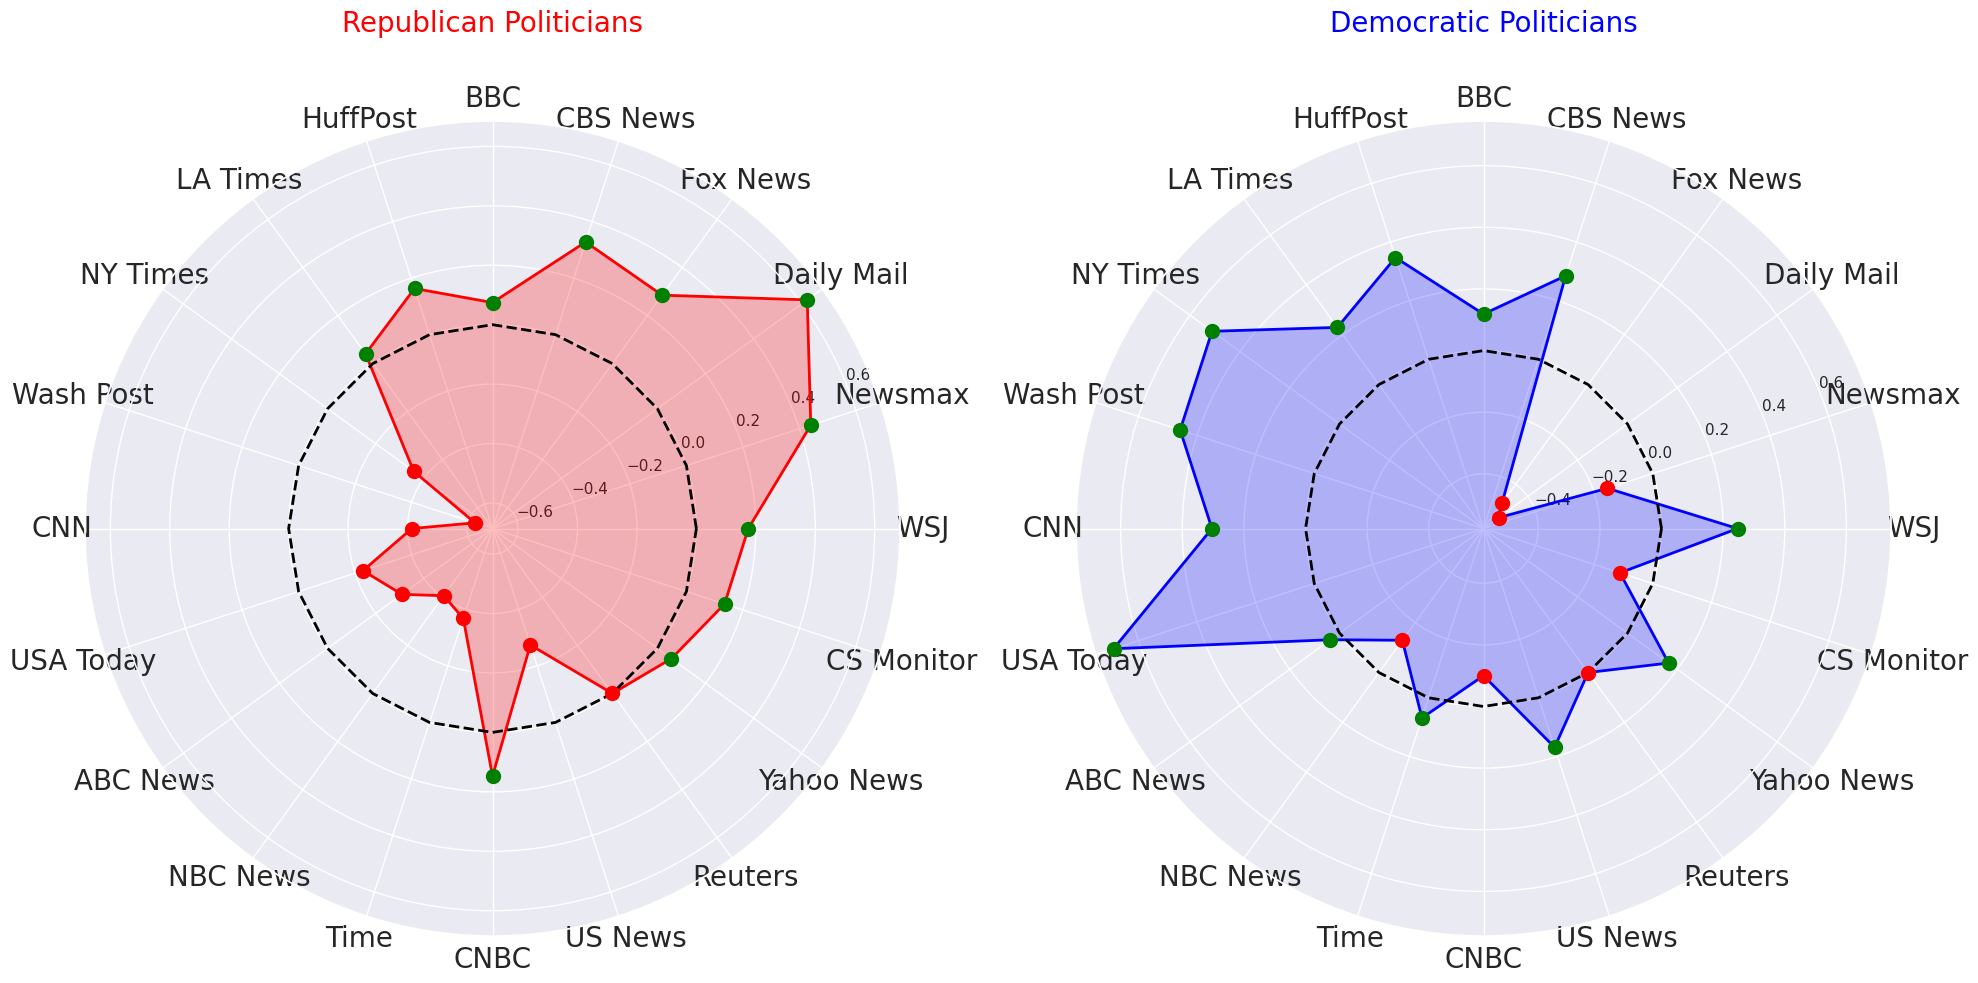

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Final_CSV_For_Analysis.csv')

news_center_affiliations = {
    'www.wsj.com': 'Republican', 'www.newsmax.com': 'Republican', 'www.dailymail.co.uk': 'Republican', 'www.foxnews.com': 'Republican', 
    'www.cbsnews.com': 'Democratic', 'www.bbc.com': 'Democratic', 'www.huffpost.com': 'Democratic','www.latimes.com': 'Neutral', 
    'www.nytimes.com': 'Democratic', 'www.washingtonpost.com': 'Democratic', 'www.cnn.com': 'Democratic', 
    'www.usatoday.com': 'Neutral', 'abcnews.go.com': 'Democratic', 'www.nbcnews.com': 'Democratic', 'time.com': 'Democratic', 
    'www.cnbc.com': 'Democratic', 'www.usnews.com': 'Neutral', 'www.reuters.com': 'Neutral', 'news.yahoo.com': 'Neutral',
    'www.csmonitor.com': 'Neutral'
}

short_names = {
    'www.bbc.com': 'BBC', 'www.nytimes.com': 'NY Times', 'www.huffpost.com': 'HuffPost', 
    'www.washingtonpost.com': 'Wash Post', 'www.wsj.com': 'WSJ', 'www.cnn.com': 'CNN', 
    'www.cbsnews.com': 'CBS News', 'www.latimes.com': 'LA Times', 'www.dailymail.co.uk': 'Daily Mail', 
    'abcnews.go.com': 'ABC News', 'www.nbcnews.com': 'NBC News', 'www.foxnews.com': 'Fox News', 
    'www.newsmax.com': 'Newsmax', 'www.usnews.com': 'US News', 'time.com': 'Time', 
    'www.reuters.com': 'Reuters', 'news.yahoo.com': 'Yahoo News', 'www.usatoday.com': 'USA Today', 
    'www.cnbc.com': 'CNBC', 'www.csmonitor.com': 'CS Monitor'
}

person_affiliations = {
    'Joe Biden': 'Democratic', 'Donald Trump': 'Republican', 'Kamala Harris': 'Democratic', 
    'Mitch Mcconnell': 'Republican', 'Nancy Pelosi': 'Democratic', 'Mike Pence': 'Republican', 
    'Barack Obama': 'Democratic', 'Hillary Clinton': 'Democratic', 'Kevin McCarthy': 'Republican', 
    'Liz Cheney': 'Republican', 'Chuck Schumer': 'Democratic', 'Hal Rogers': 'Republican', 
    'Mitt Romney': 'Republican', 'Elizabeth Warren': 'Democratic', 'John Roberts': 'Republican', 
    'Bernie Sanders': 'Democratic', 'Joe Manchin': 'Democratic', 'Cory Booker': 'Democratic', 
    'Ted Cruz': 'Republican', 'Gavin Newsom': 'Democratic', 'Rand Paul': 'Republican', 
    'Marco Rubio': 'Republican', 'Amy Klobuchar': 'Democratic', 'Susan Collins': 'Republican', 
    'Bill de Blasio': 'Democratic', 'Janet Yellen': 'Democratic', 'Steny Hoyer': 'Democratic', 
    'James Clyburn': 'Democratic', 'Randy Biggs': 'Republican', 'Greg Abbott': 'Republican'
}

selected_news_centers = list(news_center_affiliations.keys())

mean_smile_effect = {
    'News Center': [],
    'Republican Politicians': [],
    'Democratic Politicians': []
}

for news_center in selected_news_centers:
    smile_column = f"Final_Ratio_{news_center}"
    if smile_column in df.columns:
        republican_mean_effect = df[(df['Real Person Side'] == 'Republican')][smile_column].mean()
        democratic_mean_effect = df[(df['Real Person Side'] == 'Democratic')][smile_column].mean()
        mean_smile_effect['News Center'].append(news_center)
        mean_smile_effect['Republican Politicians'].append(republican_mean_effect if not np.isnan(republican_mean_effect) else 0)
        mean_smile_effect['Democratic Politicians'].append(democratic_mean_effect if not np.isnan(democratic_mean_effect) else 0)

mean_smile_effect_df = pd.DataFrame(mean_smile_effect)

labels = mean_smile_effect_df['News Center'].map(short_names)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw=dict(polar=True))

republican_values = mean_smile_effect_df['Republican Politicians'].tolist()
republican_values += republican_values[:1]
ax1.plot(angles, republican_values, color='red', linewidth=2, linestyle='solid', label='Republican Politicians')
ax1.fill(angles, republican_values, color='red', alpha=0.25)

zero_circle = [0] * len(angles)
ax1.plot(angles, zero_circle, color='black', linewidth=2, linestyle='dashed', label='Zero Line')

for i, val in enumerate(mean_smile_effect_df['Republican Politicians']):
    color = 'green' if val > 0 else 'red'
    ax1.plot(angles[i], val, 'o', color=color, markersize=10)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(labels, size=20)
ax1.set_title('Republican Politicians', size=20, color='red', y=1.1)

democratic_values = mean_smile_effect_df['Democratic Politicians'].tolist()
democratic_values += democratic_values[:1]
ax2.plot(angles, democratic_values, color='blue', linewidth=2, linestyle='solid', label='Democratic Politicians')
ax2.fill(angles, democratic_values, color='blue', alpha=0.25)

ax2.plot(angles, zero_circle, color='black', linewidth=2, linestyle='dashed', label='Zero Line')

for i, val in enumerate(mean_smile_effect_df['Democratic Politicians']):
    color = 'green' if val > 0 else 'red'
    ax2.plot(angles[i], val, 'o', color=color, markersize=10)

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(labels, size=20)
ax2.set_title('Democratic Politicians', size=20, color='blue', y=1.1)

plt.tight_layout()
#plt.savefig('Fig_smile_effect_Radar_NewsOutlet.png', dpi=70)
plt.show()


### Figures 11 and 12: Conservative Visual Slant (CSV)


    Republican Politicians  Democratic Politicians
3                -0.623753                0.457621
17               -0.227559                0.684882
1                -0.358410                0.511491
5                -0.414532                0.303806
13               -0.274160                0.169039
14               -0.367946                0.068727
9                -0.309253                0.036367
10               -0.406695               -0.129287
7                 0.040731                0.229354
2                 0.163345                0.347100
16                0.058402                0.164972
4                 0.174797                0.247083
0                 0.074393                0.118436
15                0.000000                0.000000
6                 0.327852                0.284997
19                0.135084               -0.111951
18                0.147019               -0.100028
12                0.440140               -0.154716
11                0.284748     

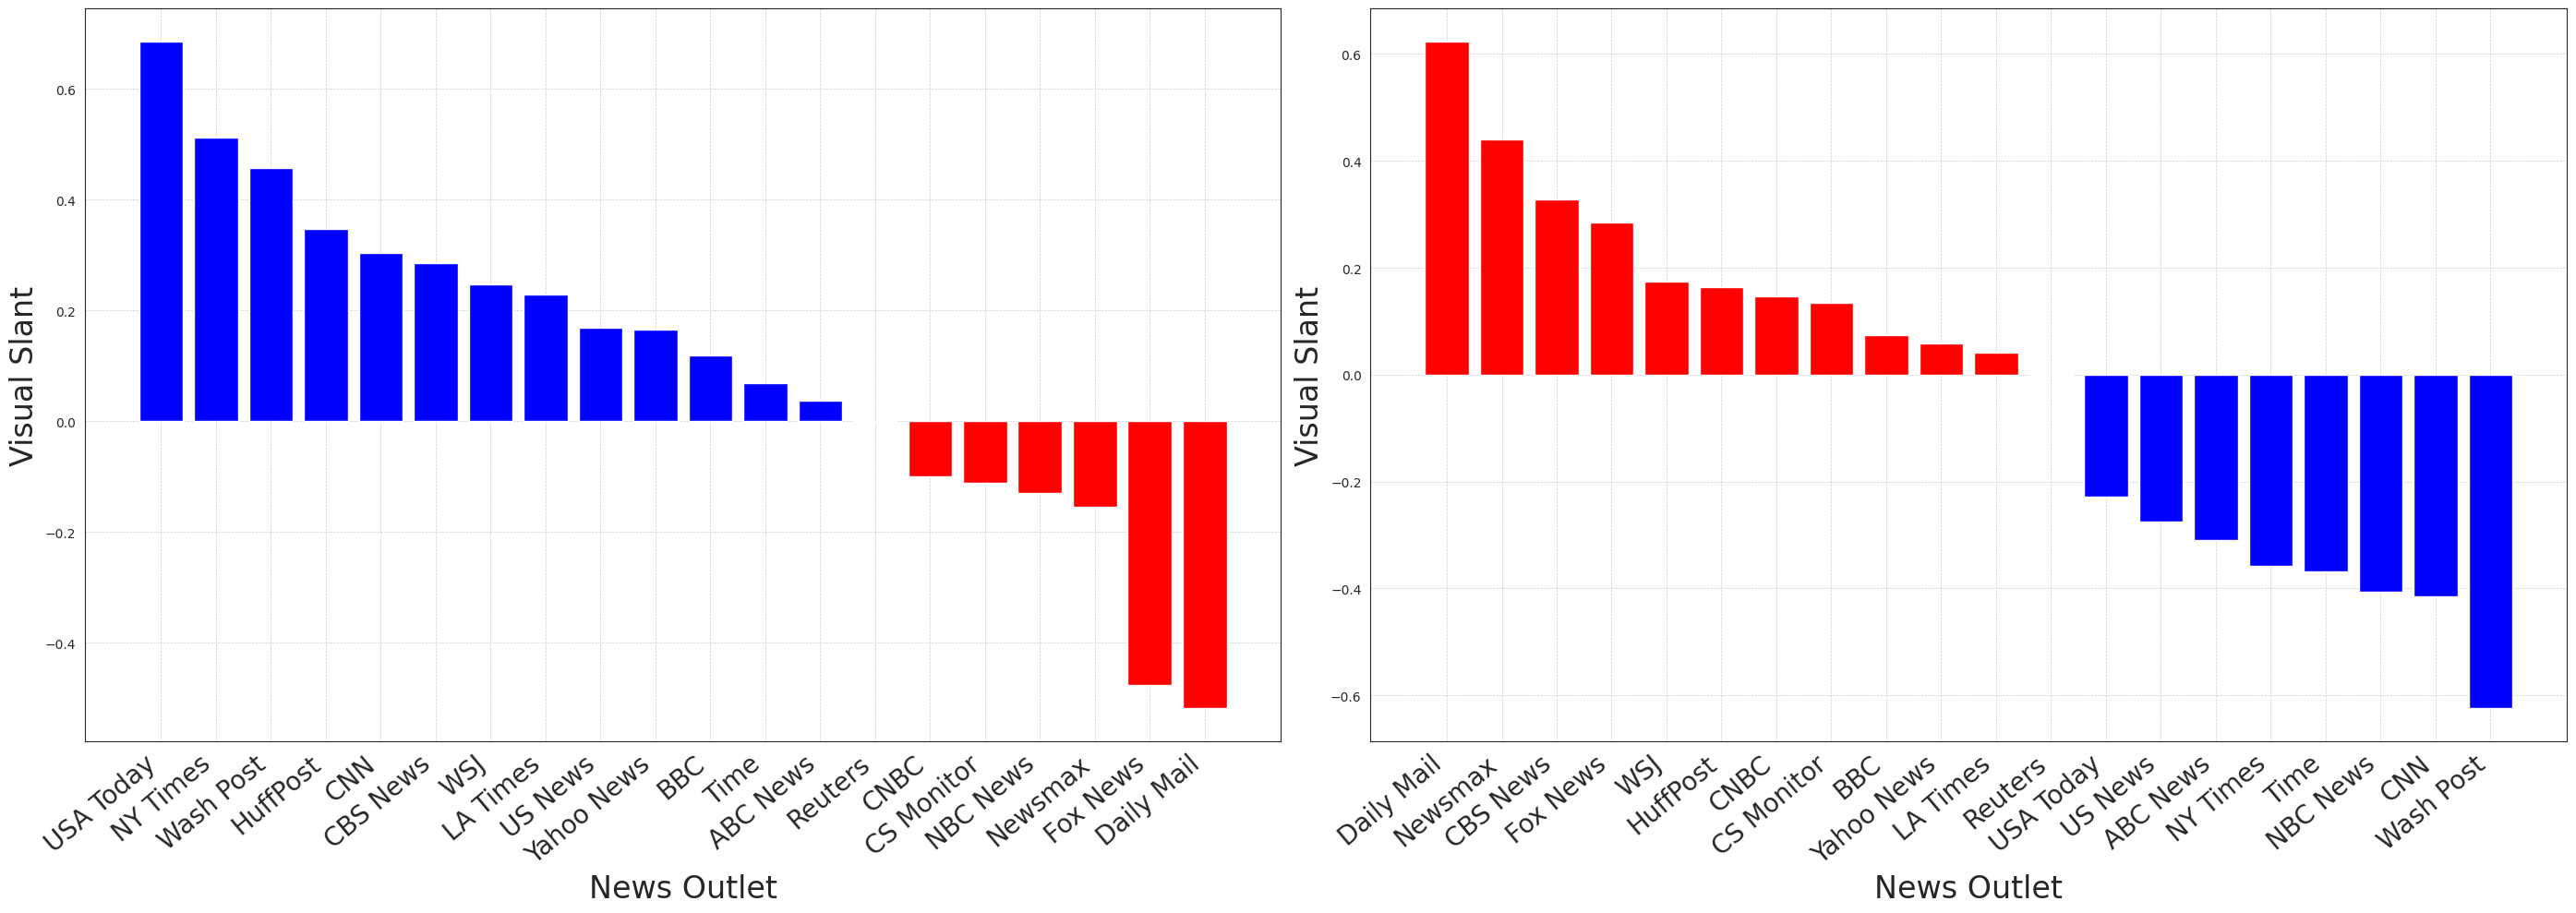

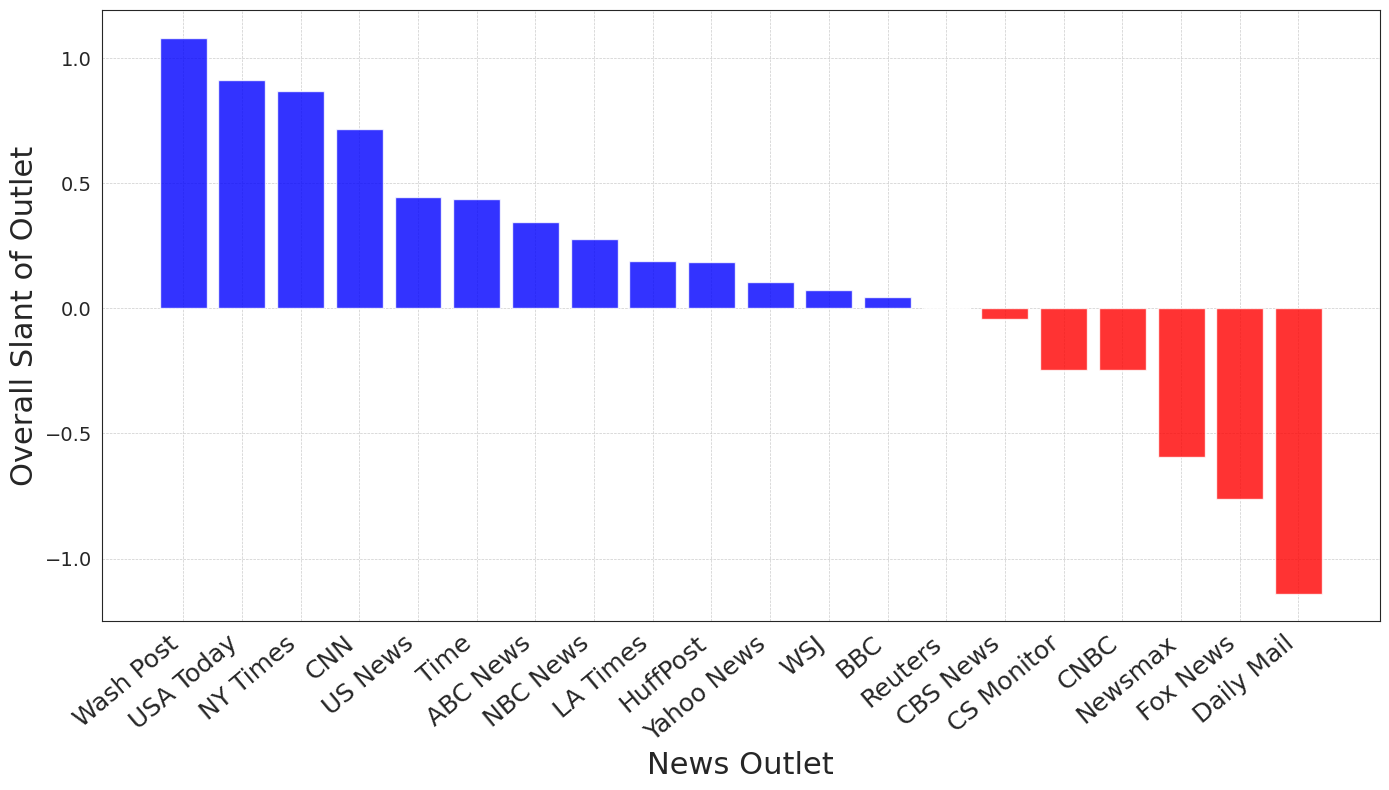

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import seaborn as sns

df = pd.read_csv('Final_CSV_For_Analysis.csv').copy()

plt.style.use('default')
sns.set_style("white")

news_center_affiliations = {
    'www.bbc.com': 'Democratic', 'www.nytimes.com': 'Democratic', 'www.huffpost.com': 'Democratic', 
    'www.washingtonpost.com': 'Democratic', 'www.wsj.com': 'Republican', 'www.cnn.com': 'Democratic', 
    'www.cbsnews.com': 'Democratic', 'www.latimes.com': 'Neutral', 'www.dailymail.co.uk': 'Republican', 
    'abcnews.go.com': 'Democratic', 'www.nbcnews.com': 'Democratic', 'www.foxnews.com': 'Republican', 
    'www.newsmax.com': 'Republican', 'www.usnews.com': 'Neutral', 'time.com': 'Democratic', 
    'www.reuters.com': 'Neutral', 'news.yahoo.com': 'Neutral', 'www.usatoday.com': 'Neutral', 
    'www.cnbc.com': 'Democratic', 'www.csmonitor.com': 'Neutral'
}

short_names = {
    'www.bbc.com': 'BBC', 'www.nytimes.com': 'NY Times', 'www.huffpost.com': 'HuffPost', 
    'www.washingtonpost.com': 'Wash Post', 'www.wsj.com': 'WSJ', 'www.cnn.com': 'CNN', 
    'www.cbsnews.com': 'CBS News', 'www.latimes.com': 'LA Times', 'www.dailymail.co.uk': 'Daily Mail', 
    'abcnews.go.com': 'ABC News', 'www.nbcnews.com': 'NBC News', 'www.foxnews.com': 'Fox News', 
    'www.newsmax.com': 'Newsmax', 'www.usnews.com': 'US News', 'time.com': 'Time', 
    'www.reuters.com': 'Reuters', 'news.yahoo.com': 'Yahoo News', 'www.usatoday.com': 'USA Today', 
    'www.cnbc.com': 'CNBC', 'www.csmonitor.com': 'CS Monitor'
}

selected_news_centers = list(news_center_affiliations.keys())

mean_smile_effect = {
    'News Center': [],
    'Republican Politicians': [],
    'Democratic Politicians': []
}

for news_center in selected_news_centers:
    smile_column = f"Final_Ratio_{news_center}"
    if smile_column in df.columns:
        republican_mean_effect = df[(df['Real Person Side'] == 'Republican')][smile_column].mean()
        democratic_mean_effect = df[(df['Real Person Side'] == 'Democratic')][smile_column].mean()
        mean_smile_effect['News Center'].append(news_center)
        mean_smile_effect['Republican Politicians'].append(republican_mean_effect if not np.isnan(republican_mean_effect) else 0)
        mean_smile_effect['Democratic Politicians'].append(democratic_mean_effect if not np.isnan(democratic_mean_effect) else 0)

mean_smile_effect_df = pd.DataFrame(mean_smile_effect)

democratic_sorted_df = mean_smile_effect_df.sort_values(by='Democratic Politicians', ascending=False)
republican_sorted_df = mean_smile_effect_df.sort_values(by='Republican Politicians', ascending=False)

fig_side_by_side, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))

democratic_values = democratic_sorted_df['Democratic Politicians']
democratic_colors = ['blue' if val > 0 else 'red' for val in democratic_values]
ax1.bar(democratic_sorted_df['News Center'], democratic_values, color=democratic_colors)
ax1.set_title('Polarization for Democratic Politicians', fontsize=24)
ax1.set_title('', fontsize=24)
ax1.set_xlabel('News Outlet', fontsize=24)
ax1.set_ylabel('Visual Slant', fontsize=24)
ax1.set_xticks(range(len(democratic_sorted_df['News Center'])))
ax1.set_xticklabels([short_names[nc] for nc in democratic_sorted_df['News Center']], ha='right', rotation=40, fontsize=20)
ax1.grid(True, linestyle='--', linewidth=0.5)

republican_values = republican_sorted_df['Republican Politicians']
republican_colors = ['red' if val > 0 else 'blue' for val in republican_values]
ax2.bar(republican_sorted_df['News Center'], republican_values, color=republican_colors)
ax2.set_title('Polarization for Republican Politicians', fontsize=24)
ax2.set_title('', fontsize=24)
ax2.set_xlabel('News Outlet', fontsize=24)
ax2.set_ylabel('Visual Slant', fontsize=24)
ax2.set_xticks(range(len(republican_sorted_df['News Center'])))
ax2.set_xticklabels([short_names[nc] for nc in republican_sorted_df['News Center']], ha='right', rotation=40, fontsize=20)
ax2.grid(True, linestyle='--', linewidth=0.5)

fig_side_by_side.tight_layout()
#fig_side_by_side.savefig('Fig_side_by_side_smile_effect.png', dpi=100)

mean_smile_effect_df['Overall Polarization'] = (mean_smile_effect_df['Democratic Politicians'] - mean_smile_effect_df['Republican Politicians'])

mean_smile_effect_df = mean_smile_effect_df.sort_values(by='Overall Polarization', ascending=False)

print(mean_smile_effect_df[['Republican Politicians', 'Democratic Politicians']])
mean_smile_effect_df['Difference'] = mean_smile_effect_df['Republican Politicians'] - mean_smile_effect_df['Democratic Politicians']
print(mean_smile_effect_df[['Difference', 'Overall Polarization']])

fig3, ax3 = plt.subplots(figsize=(14, 8))

bar_colors = ['blue' if value > 0 else 'red' for value in mean_smile_effect_df['Overall Polarization']]
bars = ax3.bar(mean_smile_effect_df['News Center'], mean_smile_effect_df['Overall Polarization'], color=bar_colors, alpha=0.8)

ax3.set_xlabel('News Outlet', fontsize=22)
ax3.set_ylabel('Overall Slant of Outlet', fontsize=22)
ax3.set_xticks(range(len(mean_smile_effect_df['News Center'])))
ax3.set_xticklabels([short_names[nc] for nc in mean_smile_effect_df['News Center']], ha='right', rotation=40, fontsize=18)
ax3.tick_params(axis='y', labelsize=14)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

fig3.tight_layout()
#fig3.savefig('Fig_overall_polarization.png', dpi=70)

plt.show()


### Figures 12, A7, A8, A9


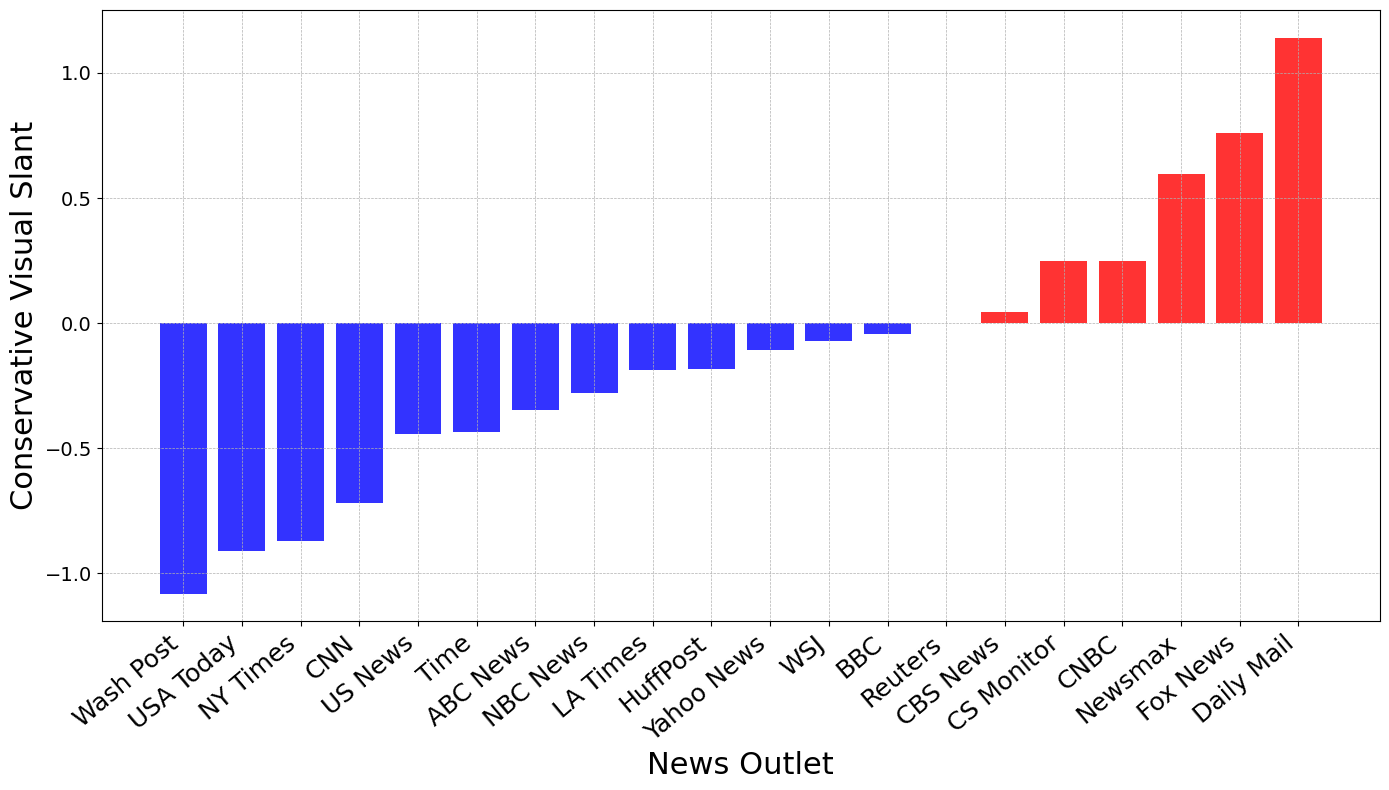

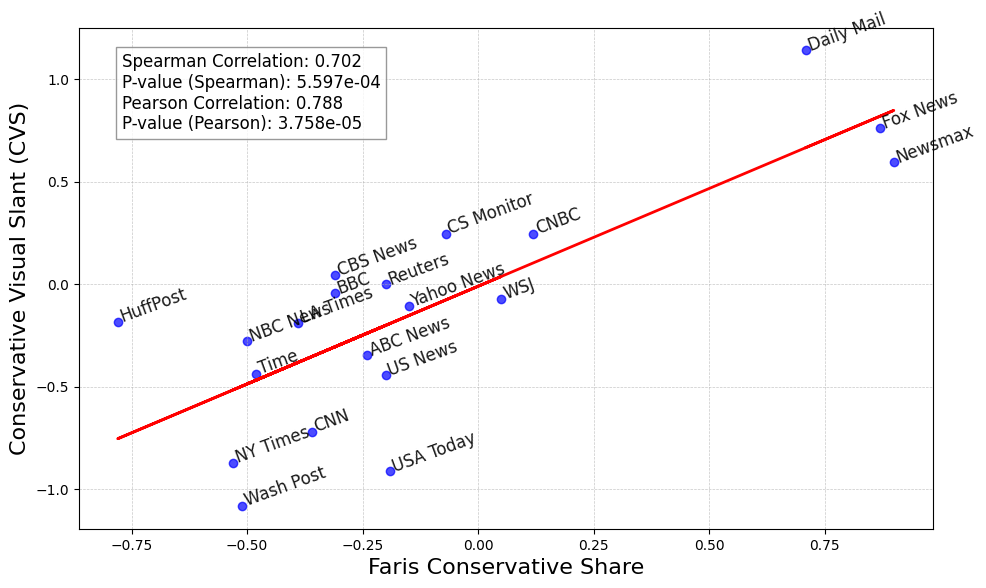

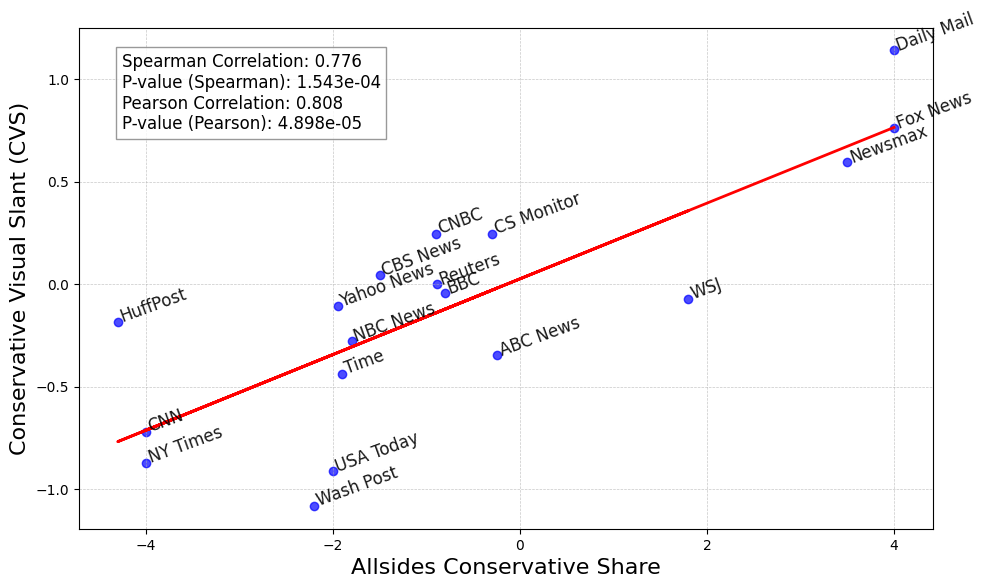

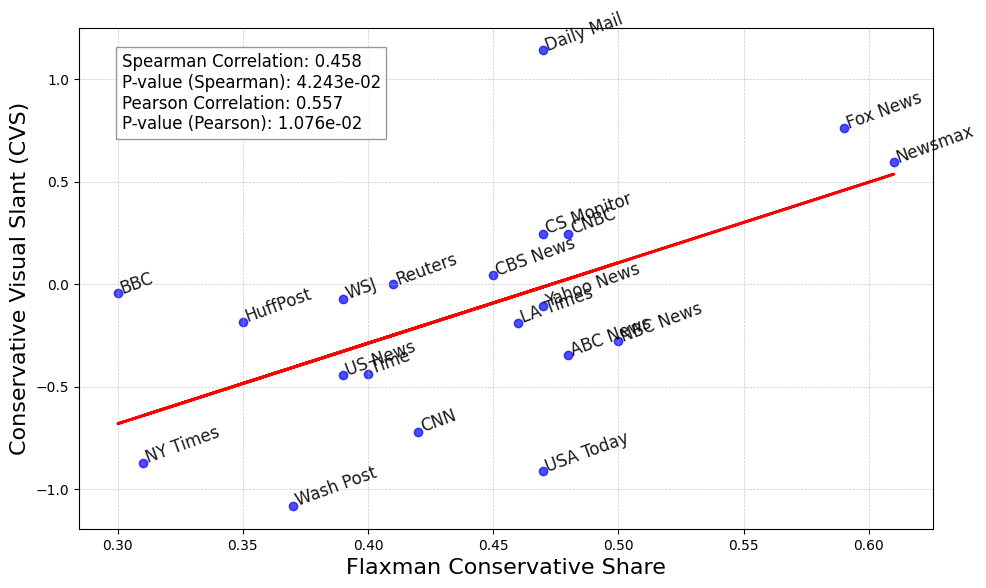

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import statsmodels.api as sm
from scipy.stats import spearmanr, pearsonr

df = pd.read_csv('Final_CSV_For_Analysis.csv').copy()

plt.style.use('default')

news_center_affiliations = {
    'www.bbc.com': 'Democratic', 'www.nytimes.com': 'Democratic', 'www.huffpost.com': 'Democratic',
    'www.washingtonpost.com': 'Democratic', 'www.wsj.com': 'Republican', 'www.cnn.com': 'Democratic',
    'www.cbsnews.com': 'Democratic', 'www.latimes.com': 'Neutral', 'www.dailymail.co.uk': 'Republican',
    'abcnews.go.com': 'Democratic', 'www.nbcnews.com': 'Democratic', 'www.foxnews.com': 'Republican',
    'www.newsmax.com': 'Republican', 'www.usnews.com': 'Neutral', 'time.com': 'Democratic',
    'www.reuters.com': 'Neutral', 'news.yahoo.com': 'Neutral', 'www.usatoday.com': 'Neutral',
    'www.cnbc.com': 'Democratic', 'www.csmonitor.com': 'Neutral'
}

short_names = {
    'www.bbc.com': 'BBC', 'www.nytimes.com': 'NY Times', 'www.huffpost.com': 'HuffPost',
    'www.washingtonpost.com': 'Wash Post', 'www.wsj.com': 'WSJ', 'www.cnn.com': 'CNN',
    'www.cbsnews.com': 'CBS News', 'www.latimes.com': 'LA Times', 'www.dailymail.co.uk': 'Daily Mail',
    'abcnews.go.com': 'ABC News', 'www.nbcnews.com': 'NBC News', 'www.foxnews.com': 'Fox News',
    'www.newsmax.com': 'Newsmax', 'www.usnews.com': 'US News', 'time.com': 'Time',
    'www.reuters.com': 'Reuters', 'news.yahoo.com': 'Yahoo News', 'www.usatoday.com': 'USA Today',
    'www.cnbc.com': 'CNBC', 'www.csmonitor.com': 'CS Monitor'
}

selected_news_centers = list(news_center_affiliations.keys())

mean_smile_effect = {
    'News Center': [],
    'Republican Politicians': [],
    'Democratic Politicians': []
}

for news_center in selected_news_centers:
    smile_column = f"Final_Ratio_{news_center}"
    if smile_column in df.columns:
        republican_mean_effect = df[(df['Real Person Side'] == 'Republican')][smile_column].mean()
        democratic_mean_effect = df[(df['Real Person Side'] == 'Democratic')][smile_column].mean()
        mean_smile_effect['News Center'].append(news_center)
        mean_smile_effect['Republican Politicians'].append(republican_mean_effect if not np.isnan(republican_mean_effect) else 0)
        mean_smile_effect['Democratic Politicians'].append(democratic_mean_effect if not np.isnan(democratic_mean_effect) else 0)

mean_smile_effect_df = pd.DataFrame(mean_smile_effect)
mean_smile_effect_df['Overall Polarization'] = (mean_smile_effect_df['Republican Politicians'] - mean_smile_effect_df['Democratic Politicians'])
mean_smile_effect_df = mean_smile_effect_df.sort_values(by='Overall Polarization', ascending=True)

fig3, ax3 = plt.subplots(figsize=(14, 8))
bar_colors = ['red' if value > 0 else 'blue' for value in mean_smile_effect_df['Overall Polarization']]
ax3.bar(mean_smile_effect_df['News Center'], mean_smile_effect_df['Overall Polarization'], color=bar_colors, alpha=0.8)
ax3.set_xlabel('News Outlet', fontsize=22)
ax3.set_ylabel('Conservative Visual Slant', fontsize=22)
ax3.set_xticks(range(len(mean_smile_effect_df['News Center'])))
ax3.set_xticklabels([short_names[nc] for nc in mean_smile_effect_df['News Center']], ha='right', rotation=40, fontsize=18)
ax3.tick_params(axis='y', labelsize=14)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
fig3.tight_layout()
fig3.savefig('Fig_overall_polarization.png', dpi=70)
plt.show()

harvard = {'www.bbc.com': -0.31, 'www.nytimes.com': -0.53, 'www.huffpost.com': -0.78, 'www.washingtonpost.com': -0.51,
           'www.wsj.com': 0.05, 'www.usnews.com': -0.20, 'time.com': -0.48, 'www.reuters.com': -0.20, 'www.cnn.com': -0.36,
           'www.cbsnews.com': -0.31, 'www.latimes.com': -0.39, 'news.yahoo.com': -0.15, 'www.usatoday.com': -0.19,
           'www.dailymail.co.uk': 0.71, 'www.cnbc.com': 0.12, 'www.csmonitor.com': -0.07, 'abcnews.go.com': -0.24,
           'www.nbcnews.com': -0.50, 'www.foxnews.com': 0.87, 'www.newsmax.com': 0.9}

allsides = {'www.bbc.com': -0.8, 'www.nytimes.com': -4, 'www.huffpost.com': -4.3, 'www.washingtonpost.com': -2.2,
            'www.wsj.com': 1.8, 'time.com': -1.9, 'www.reuters.com': -0.89, 'www.cnn.com': -4, 'www.cbsnews.com': -1.5,
            'news.yahoo.com': -1.95, 'www.usatoday.com': -2, 'www.dailymail.co.uk': 4, 'www.cnbc.com': -0.9,
            'www.csmonitor.com': -0.3, 'abcnews.go.com': -0.24, 'www.nbcnews.com': -1.8, 'www.foxnews.com': 4,
            'www.newsmax.com': 3.5}

other_paper = {'www.bbc.com': 0.30, 'www.nytimes.com': 0.31, 'www.huffpost.com': 0.35, 'www.washingtonpost.com': 0.37,
               'www.wsj.com': 0.39, 'www.usnews.com': 0.39, 'time.com': 0.40, 'www.reuters.com': 0.41, 'www.cnn.com': 0.42,
               'www.cbsnews.com': 0.45, 'www.latimes.com': 0.46, 'news.yahoo.com': 0.47, 'www.usatoday.com': 0.47,
               'www.dailymail.co.uk': 0.47, 'www.cnbc.com': 0.48, 'www.csmonitor.com': 0.47, 'abcnews.go.com': 0.48,
               'www.nbcnews.com': 0.50, 'www.foxnews.com': 0.59, 'www.newsmax.com': 0.61}

def plot_and_save_regression_with_correlation(conservative_share, conservative_label, filename):
    valid_outlets = [nc for nc in mean_smile_effect_df['News Center'] if nc in conservative_share]
    x = [conservative_share[nc] for nc in valid_outlets]
    y = mean_smile_effect_df.loc[mean_smile_effect_df['News Center'].isin(valid_outlets), 'Overall Polarization']
    spearman_corr, spearman_p_value = spearmanr(x, y)
    pearson_corr, pearson_p_value = pearsonr(x, y)
    x_with_constant = sm.add_constant(x)
    model = sm.OLS(y, x_with_constant).fit()
    intercept = model.params.iloc[0]
    slope = model.params.iloc[1]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x, y, color='blue', alpha=0.7)
    ax.plot(x, intercept + slope * np.array(x), color='red', linestyle='-', linewidth=2)
    valid_short_names = [short_names[nc] for nc in valid_outlets]
    for i, short_name in enumerate(valid_short_names):
        ax.annotate(short_name, (x[i], y.iloc[i]), fontsize=12, alpha=0.9, rotation=20)
    stats_text = (
        f"Spearman Correlation: {spearman_corr:.3f}\n"
        f"P-value (Spearman): {spearman_p_value:.3e}\n"
        f"Pearson Correlation: {pearson_corr:.3f}\n"
        f"P-value (Pearson): {pearson_p_value:.3e}"
    )
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
    ax.set_xlabel(conservative_label, fontsize=16)
    ax.set_ylabel("Conservative Visual Slant (CVS)", fontsize=16)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.savefig(filename, dpi=100)
    plt.show()
    plt.close(fig)

plot_and_save_regression_with_correlation(harvard, "Faris Conservative Share", "Harvard_Correlation_vs_Polarization.png")
plot_and_save_regression_with_correlation(allsides, "Allsides Conservative Share", "Allsides_Correlation_vs_Polarization.png")
plot_and_save_regression_with_correlation(other_paper, "Flaxman Conservative Share", "OtherPaper_Correlation_vs_Polarization.png")


### Figures 13


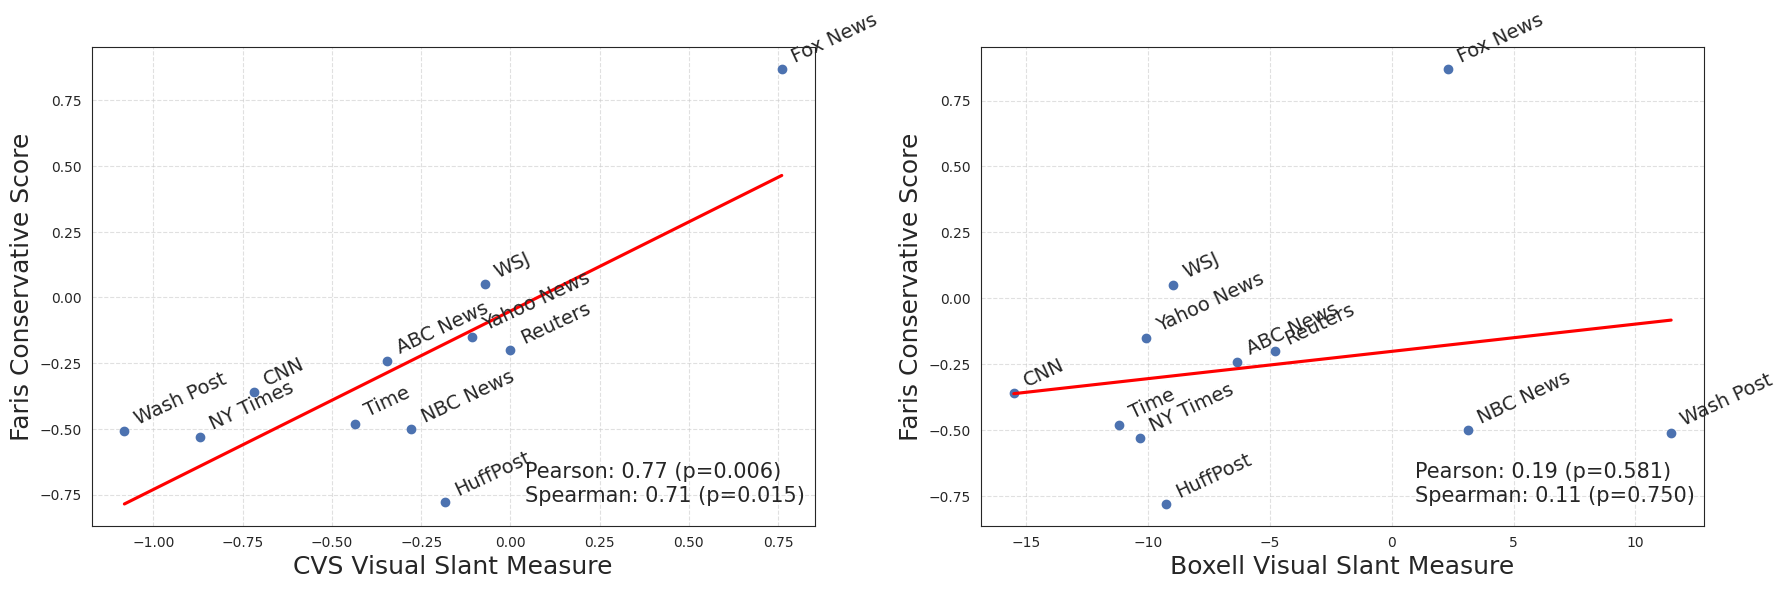

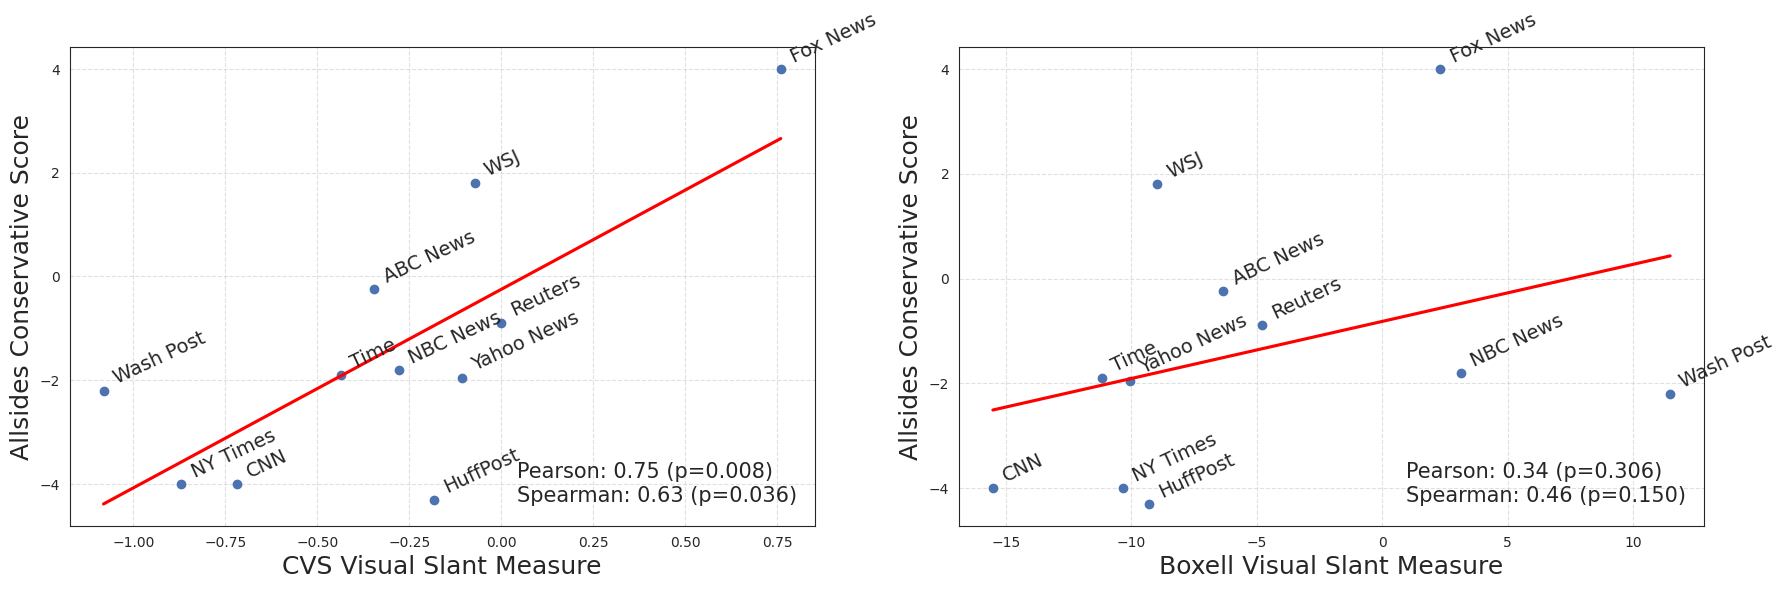

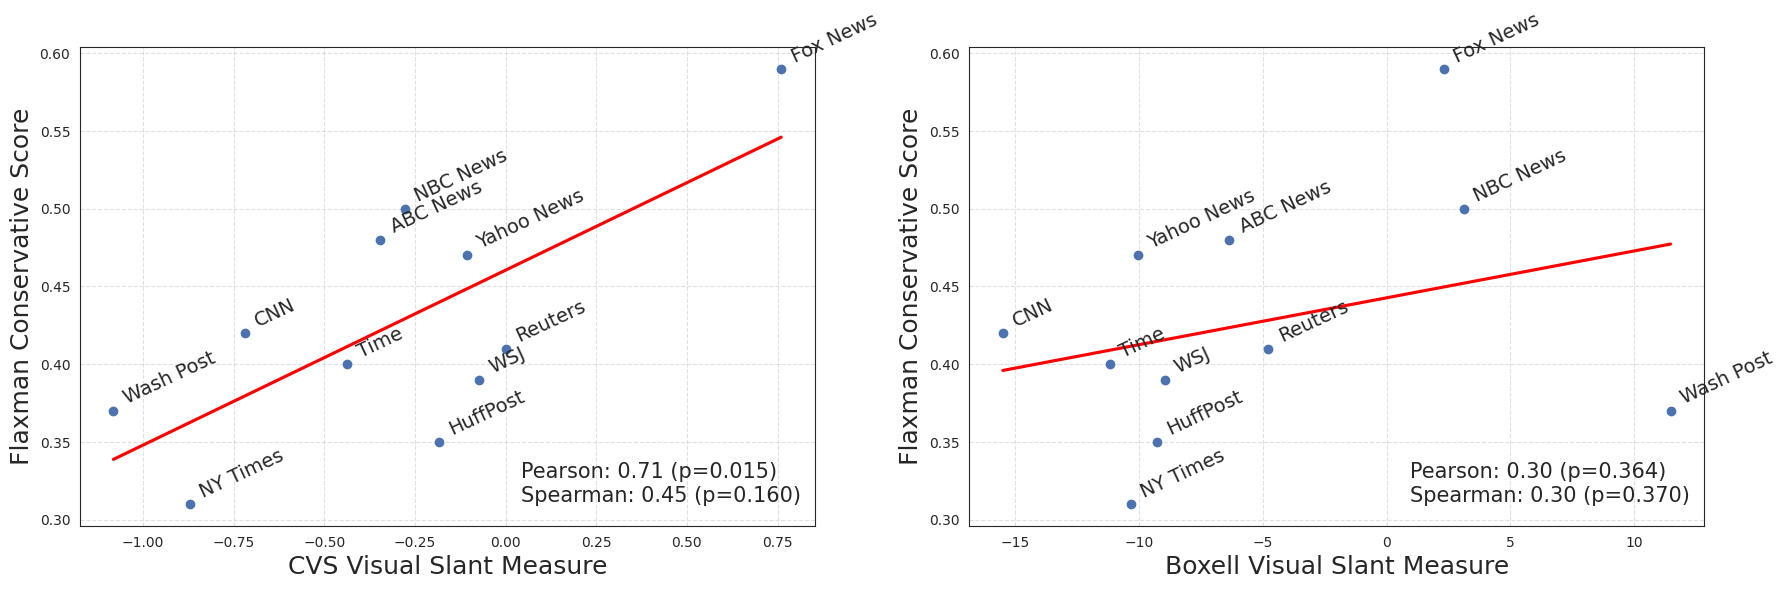

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import spearmanr, pearsonr
import seaborn as sns
import os

df = pd.read_csv('Final_CSV_For_Analysis.csv').copy()
plt.style.use('default')
sns.set_style("white")

news_center_affiliations = {
    'www.bbc.com': 'Democratic', 'www.nytimes.com': 'Democratic', 'www.huffpost.com': 'Democratic',
    'www.washingtonpost.com': 'Democratic', 'www.wsj.com': 'Republican', 'www.cnn.com': 'Democratic',
    'www.cbsnews.com': 'Democratic', 'www.latimes.com': 'Neutral', 'www.dailymail.co.uk': 'Republican',
    'abcnews.go.com': 'Democratic', 'www.nbcnews.com': 'Democratic', 'www.foxnews.com': 'Republican',
    'www.newsmax.com': 'Republican', 'www.usnews.com': 'Neutral', 'time.com': 'Democratic',
    'www.reuters.com': 'Neutral', 'news.yahoo.com': 'Neutral', 'www.usatoday.com': 'Neutral',
    'www.cnbc.com': 'Democratic', 'www.csmonitor.com': 'Neutral'
}

short_names = {
    'www.bbc.com': 'BBC', 'www.nytimes.com': 'NY Times', 'www.huffpost.com': 'HuffPost',
    'www.washingtonpost.com': 'Wash Post', 'www.wsj.com': 'WSJ', 'www.cnn.com': 'CNN',
    'www.cbsnews.com': 'CBS News', 'www.latimes.com': 'LA Times', 'www.dailymail.co.uk': 'Daily Mail',
    'abcnews.go.com': 'ABC News', 'www.nbcnews.com': 'NBC News', 'www.foxnews.com': 'Fox News',
    'www.newsmax.com': 'Newsmax', 'www.usnews.com': 'US News', 'time.com': 'Time',
    'www.reuters.com': 'Reuters', 'news.yahoo.com': 'Yahoo News', 'www.usatoday.com': 'USA Today',
    'www.cnbc.com': 'CNBC', 'www.csmonitor.com': 'CS Monitor'
}

selected_news_centers = list(news_center_affiliations.keys())

mean_smile_effect = {
    'News Center': [],
    'Republican Politicians': [],
    'Democratic Politicians': []
}

for news_center in selected_news_centers:
    smile_column = f"Final_Ratio_{news_center}"
    if smile_column in df.columns:
        republican_mean_effect = df[(df['Real Person Side'] == 'Republican')][smile_column].mean()
        democratic_mean_effect = df[(df['Real Person Side'] == 'Democratic')][smile_column].mean()
        mean_smile_effect['News Center'].append(news_center)
        mean_smile_effect['Republican Politicians'].append(republican_mean_effect if not np.isnan(republican_mean_effect) else 0)
        mean_smile_effect['Democratic Politicians'].append(democratic_mean_effect if not np.isnan(democratic_mean_effect) else 0)

mean_smile_effect_df = pd.DataFrame(mean_smile_effect)
mean_smile_effect_df['Overall Polarization'] = (mean_smile_effect_df['Republican Politicians'] - mean_smile_effect_df['Democratic Politicians'])
mean_smile_effect_df = mean_smile_effect_df.sort_values(by='Overall Polarization', ascending=True)

Boxell = {'www.bbc.com': None, 'www.nytimes.com': -10.341, 'www.huffpost.com': -9.280, 'www.washingtonpost.com': 11.470,
          'www.wsj.com': -8.970, 'www.usnews.com': None, 'time.com': -11.174, 'www.reuters.com': -4.778,
          'www.cnn.com': -15.510, 'www.cbsnews.com': None, 'www.latimes.com': None, 'news.yahoo.com': -10.064,
          'www.usatoday.com': None, 'www.dailymail.co.uk': None, 'www.cnbc.com': None, 'www.csmonitor.com': None,
          'abcnews.go.com': -6.359, 'www.nbcnews.com': 3.126, 'www.foxnews.com': 2.320, 'www.newsmax.com': None}
valid_outlets = {k for k, v in Boxell.items() if v is not None}
mean_smile_effect_df = mean_smile_effect_df[mean_smile_effect_df['News Center'].isin(valid_outlets)]

harvard = {'www.bbc.com': -0.31, 'www.nytimes.com': -0.53, 'www.huffpost.com': -0.78, 'www.washingtonpost.com': -0.51,
           'www.wsj.com': 0.05, 'www.usnews.com': -0.20, 'time.com': -0.48, 'www.reuters.com': -0.20, 'www.cnn.com': -0.36,
           'www.cbsnews.com': -0.31, 'www.latimes.com': -0.39, 'news.yahoo.com': -0.15, 'www.usatoday.com': -0.19,
           'www.dailymail.co.uk': 0.71, 'www.cnbc.com': 0.12, 'www.csmonitor.com': -0.07, 'abcnews.go.com': -0.24,
           'www.nbcnews.com': -0.50, 'www.foxnews.com': 0.87, 'www.newsmax.com': 0.9}

allsides = {'www.bbc.com': -0.8, 'www.nytimes.com': -4, 'www.huffpost.com': -4.3, 'www.washingtonpost.com': -2.2,
            'www.wsj.com': 1.8, 'time.com': -1.9, 'www.reuters.com': -0.89, 'www.cnn.com': -4, 'www.cbsnews.com': -1.5,
            'news.yahoo.com': -1.95, 'www.usatoday.com': -2, 'www.dailymail.co.uk': 4, 'www.cnbc.com': -0.9,
            'www.csmonitor.com': -0.3, 'abcnews.go.com': -0.24, 'www.nbcnews.com': -1.8, 'www.foxnews.com': 4,
            'www.newsmax.com': 3.5}

other_paper = {'www.bbc.com': 0.30, 'www.nytimes.com': 0.31, 'www.huffpost.com': 0.35, 'www.washingtonpost.com': 0.37,
               'www.wsj.com': 0.39, 'www.usnews.com': 0.39, 'time.com': 0.40, 'www.reuters.com': 0.41, 'www.cnn.com': 0.42,
               'www.cbsnews.com': 0.45, 'www.latimes.com': 0.46, 'news.yahoo.com': 0.47, 'www.usatoday.com': 0.47,
               'www.dailymail.co.uk': 0.47, 'www.cnbc.com': 0.48, 'www.csmonitor.com': 0.47, 'abcnews.go.com': 0.48,
               'www.nbcnews.com': 0.50, 'www.foxnews.com': 0.59, 'www.newsmax.com': 0.61}

datasets = {
    'Faris Conservative Score': harvard,
    'Allsides Conservative Score': allsides,
    'Flaxman Conservative Score': other_paper
}

output_dir = "conservative_share_plots"
os.makedirs(output_dir, exist_ok=True)

x_datasets = ['Faris Conservative Score', 'Allsides Conservative Score', 'Flaxman Conservative Score']
y_datasets = ['CVS', 'Boxell']

for i, x_data in enumerate(x_datasets):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    for j, y_data in enumerate(y_datasets):
        ax = axes[j]
        y_values = datasets[x_data]
        x_values = mean_smile_effect_df.set_index('News Center')['Overall Polarization'].to_dict() if y_data == 'CVS' else Boxell
        common_keys = valid_outlets & set(y_values.keys())
        x_vals = [x_values[k] for k in common_keys if x_values[k] is not None and y_values[k] is not None]
        y_vals = [y_values[k] for k in common_keys if x_values[k] is not None and y_values[k] is not None]
        labels = [short_names[k] for k in common_keys if x_values[k] is not None and y_values[k] is not None]
        ax.scatter(x_vals, y_vals, color='b')
        if len(x_vals) > 1:
            sns.regplot(x=x_vals, y=y_vals, scatter=False, ax=ax, color='red', ci=None)
        for label, x, y in zip(labels, x_vals, y_vals):
            ax.annotate(label, (x, y), fontsize=14, xytext=(5, 5), textcoords='offset points', rotation=25)
        if len(x_vals) > 1:
            pearson_corr, pearson_pval = pearsonr(x_vals, y_vals)
            spearman_corr, spearman_pval = spearmanr(x_vals, y_vals)
        else:
            pearson_corr, pearson_pval = (np.nan, np.nan)
            spearman_corr, spearman_pval = (np.nan, np.nan)
        ax.annotate(f'Pearson: {pearson_corr:.2f} (p={pearson_pval:.3f})', xy=(0.6, 0.1), xycoords='axes fraction', fontsize=15)
        ax.annotate(f'Spearman: {spearman_corr:.2f} (p={spearman_pval:.3f})', xy=(0.6, 0.05), xycoords='axes fraction', fontsize=15)
        ax.set_xlabel(f"{y_data} Visual Slant Measure", fontsize=18)
        ax.set_ylabel(f"{x_data}", fontsize=18)
        ax.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plot_filename = os.path.join(output_dir, f"{x_data}_comparison.png")
    plt.savefig(plot_filename)
    plt.show()
    plt.close()


### Figures 14


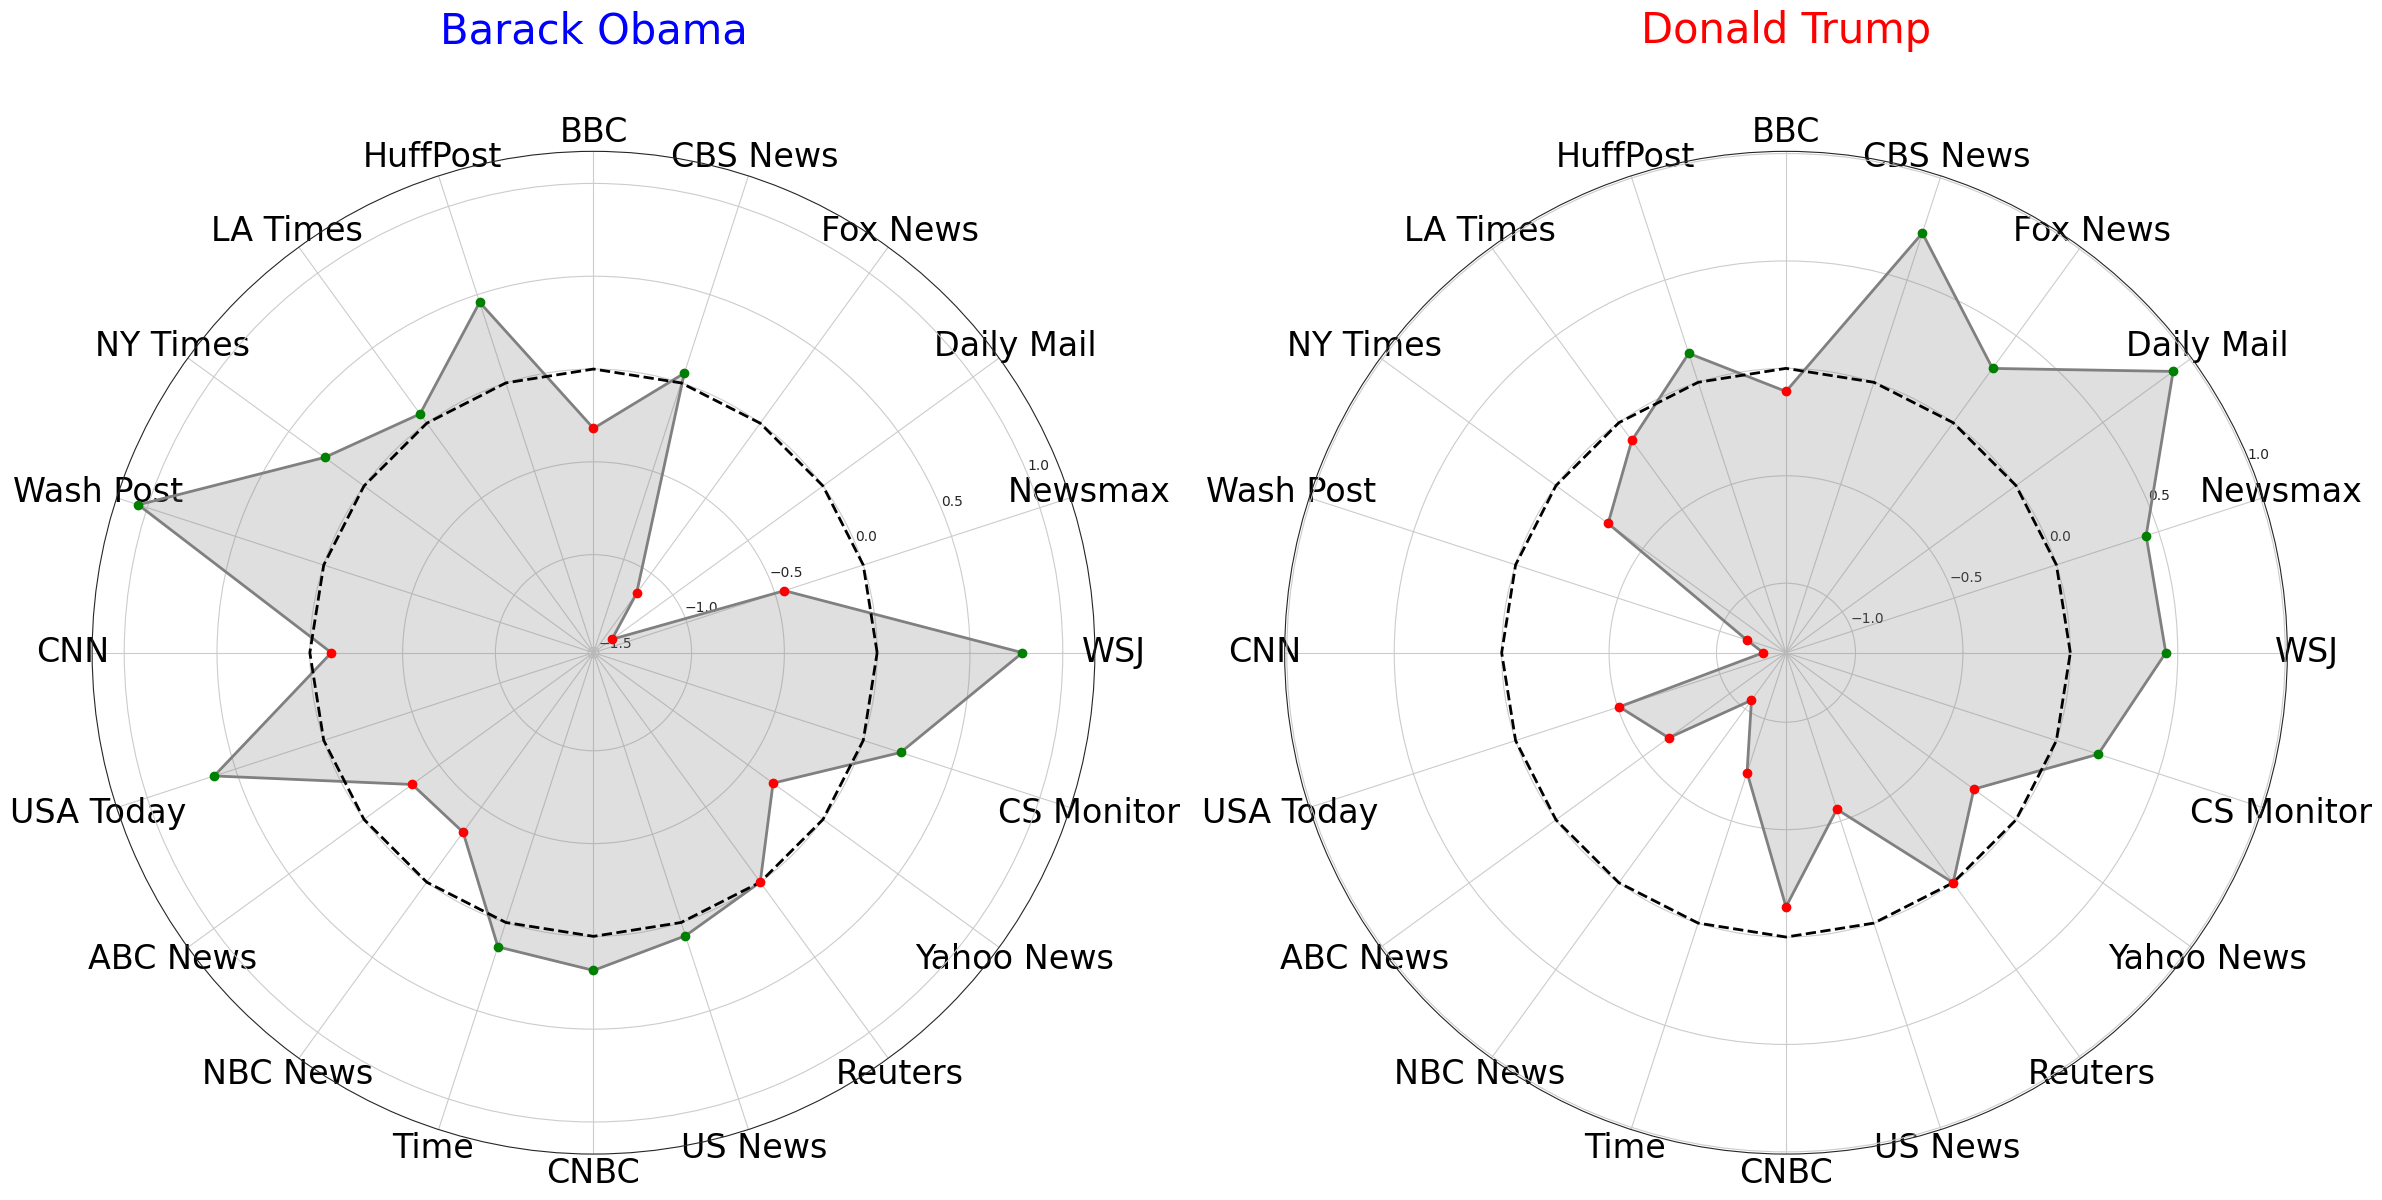

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Final_CSV_For_Analysis.csv')

news_center_affiliations = {
    'www.wsj.com': 'Republican', 'www.newsmax.com': 'Republican', 'www.dailymail.co.uk': 'Republican', 'www.foxnews.com': 'Republican',
    'www.cbsnews.com': 'Democratic', 'www.bbc.com': 'Democratic', 'www.huffpost.com': 'Democratic','www.latimes.com': 'Neutral',
    'www.nytimes.com': 'Democratic', 'www.washingtonpost.com': 'Democratic', 'www.cnn.com': 'Democratic',
    'www.usatoday.com': 'Neutral', 'abcnews.go.com': 'Democratic', 'www.nbcnews.com': 'Democratic', 'time.com': 'Democratic',
    'www.cnbc.com': 'Democratic', 'www.usnews.com': 'Neutral',
    'www.reuters.com': 'Neutral', 'news.yahoo.com': 'Neutral',
    'www.csmonitor.com': 'Neutral'
}

short_names = {
    'www.bbc.com': 'BBC', 'www.nytimes.com': 'NY Times', 'www.huffpost.com': 'HuffPost',
    'www.washingtonpost.com': 'Wash Post', 'www.wsj.com': 'WSJ', 'www.cnn.com': 'CNN',
    'www.cbsnews.com': 'CBS News', 'www.latimes.com': 'LA Times', 'www.dailymail.co.uk': 'Daily Mail',
    'abcnews.go.com': 'ABC News', 'www.nbcnews.com': 'NBC News', 'www.foxnews.com': 'Fox News',
    'www.newsmax.com': 'Newsmax', 'www.usnews.com': 'US News', 'time.com': 'Time',
    'www.reuters.com': 'Reuters', 'news.yahoo.com': 'Yahoo News', 'www.usatoday.com': 'USA Today',
    'www.cnbc.com': 'CNBC', 'www.csmonitor.com': 'CS Monitor'
}

politician_affiliations = {
    'Joe Biden': 'Democratic', 'Donald Trump': 'Republican', 'Kamala Harris': 'Democratic',
    'Mitch Mcconnell': 'Republican', 'Nancy Pelosi': 'Democratic', 'Mike Pence': 'Republican',
    'Barack Obama': 'Democratic', 'Hillary Clinton': 'Democratic', 'Kevin McCarthy': 'Republican',
    'Liz Cheney': 'Republican', 'Chuck Schumer': 'Democratic', 'Hal Rogers': 'Republican',
    'Mitt Romney': 'Republican', 'Elizabeth Warren': 'Democratic', 'John Roberts': 'Republican',
    'Bernie Sanders': 'Democratic', 'Joe Manchin': 'Democratic', 'Cory Booker': 'Democratic',
    'Ted Cruz': 'Republican', 'Gavin Newsom': 'Democratic', 'Rand Paul': 'Republican',
    'Marco Rubio': 'Republican', 'Amy Klobuchar': 'Democratic', 'Susan Collins': 'Republican',
    'Bill de Blasio': 'Democratic', 'Janet Yellen': 'Democratic', 'Steny Hoyer': 'Democratic',
    'James Clyburn': 'Democratic', 'Randy Biggs': 'Republican', 'Greg Abbott': 'Republican'
}

selected_news_centers = list(news_center_affiliations.keys())
politicians = ['Barack Obama', 'Donald Trump']

fig, axs = plt.subplots(1, 2, figsize=(24, 14), subplot_kw=dict(polar=True))

for ax, politician in zip(axs.flat, politicians):
    mean_smile_effect = {'News Center': [], 'Smile Effect': []}
    person_column = 'Political Person' if politician == 'Mitt Romney' else 'Top1_Person'
    for news_center in selected_news_centers:
        smile_column = f"Final_Ratio_{news_center}"
        if smile_column in df.columns:
            df_news_center = df[(df[person_column] == politician)]
            mean_effect = df_news_center[smile_column].mean() if not df_news_center.empty else 0
            mean_smile_effect['News Center'].append(short_names[news_center])
            mean_smile_effect['Smile Effect'].append(mean_effect if not np.isnan(mean_effect) else 0)
    mean_smile_effect_df = pd.DataFrame(mean_smile_effect)
    labels = mean_smile_effect_df['News Center']
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    values = mean_smile_effect_df['Smile Effect'].tolist()
    values += values[:1]
    ax.plot(angles, values, color='gray', linewidth=2, linestyle='solid', label=politician)
    ax.fill(angles, values, color='gray', alpha=0.25)
    ax.plot(angles, [0] * len(angles), color='black', linewidth=2, linestyle='--')
    for i in range(len(values) - 1):
        color = 'green' if values[i] > 0 else 'red'
        ax.plot(angles[i], values[i], marker='o', color=color)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, size=24)
    for label, angle in zip(ax.get_xticklabels(), angles):
        news_center = label.get_text()
        affiliation = news_center_affiliations.get(news_center, 'Neutral')
        color = 'blue' if affiliation == 'Democratic' else 'red' if affiliation == 'Republican' else 'black'
        label.set_color(color)
    title_color = 'red' if politician_affiliations[politician] == 'Republican' else 'blue'
    ax.set_title(f'{politician}', size=30, color=title_color, y=1.1)

plt.tight_layout()
#plt.savefig('Fig_Politicans_Radar2.png', dpi=70)
plt.show()


### Figure 15: Overall Visual Polarization (OVP)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


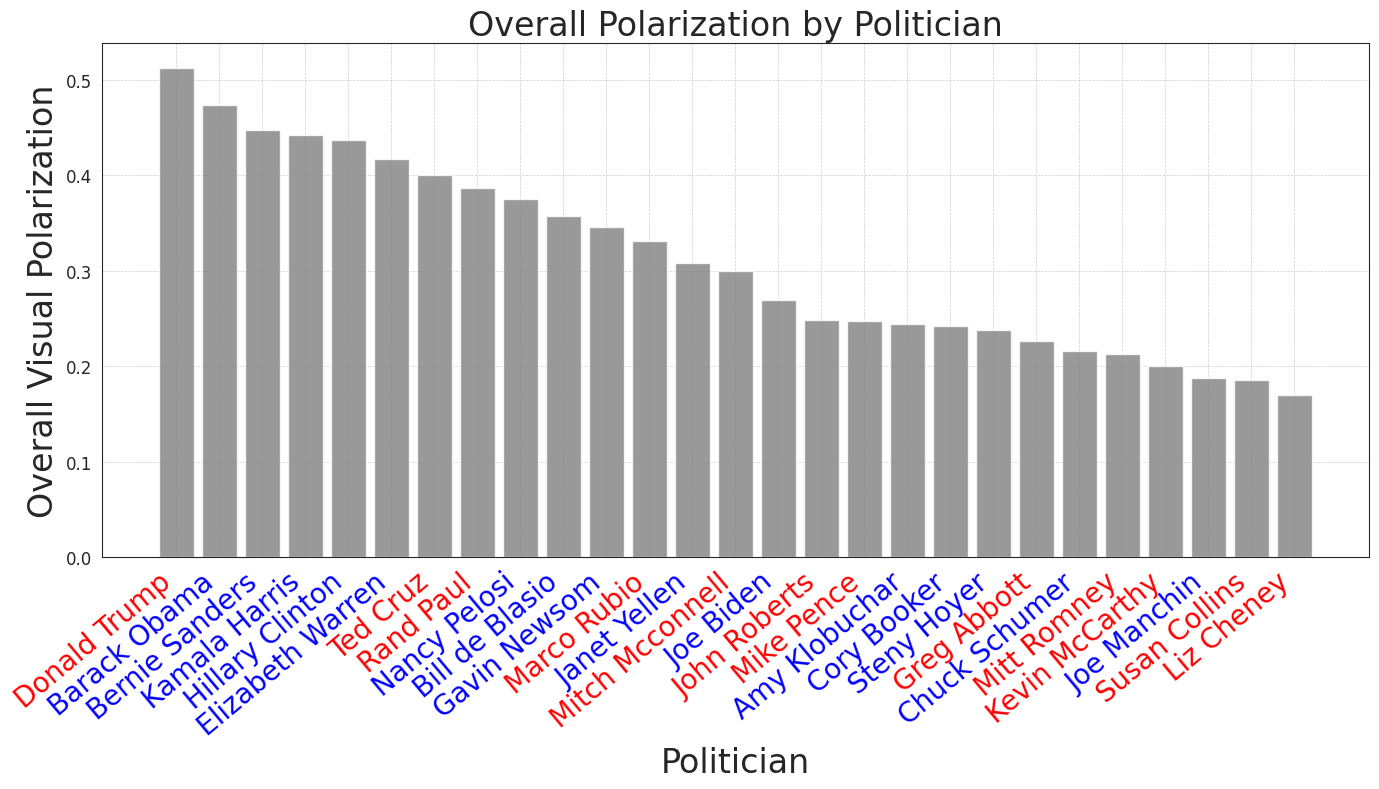

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Final_CSV_For_Analysis.csv')

news_center_affiliations = {
    'www.bbc.com': 'Democratic', 'www.nytimes.com': 'Democratic', 'www.huffpost.com': 'Democratic', 
    'www.washingtonpost.com': 'Democratic', 'www.wsj.com': 'Republican', 'www.cnn.com': 'Democratic', 
    'www.cbsnews.com': 'Democratic', 'www.latimes.com': 'Neutral', 'www.dailymail.co.uk': 'Republican', 
    'abcnews.go.com': 'Democratic', 'www.nbcnews.com': 'Democratic', 'www.foxnews.com': 'Republican', 
    'www.newsmax.com': 'Republican', 'www.usnews.com': 'Neutral', 'time.com': 'Democratic', 
    'www.reuters.com': 'Neutral', 'news.yahoo.com': 'Neutral', 'www.usatoday.com': 'Neutral', 
    'www.cnbc.com': 'Democratic', 'www.csmonitor.com': 'Neutral'
}

politician_affiliations = {
    'Joe Biden': 'Democratic', 'Donald Trump': 'Republican', 'Kamala Harris': 'Democratic', 
    'Mitch Mcconnell': 'Republican', 'Nancy Pelosi': 'Democratic', 'Mike Pence': 'Republican', 
    'Barack Obama': 'Democratic', 'Hillary Clinton': 'Democratic', 'Kevin McCarthy': 'Republican', 
    'Liz Cheney': 'Republican', 'Chuck Schumer': 'Democratic', 'Mitt Romney': 'Republican', 
    'Elizabeth Warren': 'Democratic', 'John Roberts': 'Republican', 'Bernie Sanders': 'Democratic', 
    'Joe Manchin': 'Democratic', 'Cory Booker': 'Democratic', 'Ted Cruz': 'Republican', 
    'Gavin Newsom': 'Democratic', 'Rand Paul': 'Republican', 'Marco Rubio': 'Republican', 
    'Amy Klobuchar': 'Democratic', 'Susan Collins': 'Republican', 'Bill de Blasio': 'Democratic', 
    'Janet Yellen': 'Democratic', 'Steny Hoyer': 'Democratic', 'Greg Abbott': 'Republican'
}

selected_news_centers = list(news_center_affiliations.keys())
df = df[df['News Center'].isin(selected_news_centers)]

mean_smile_effect = {
    'Politician': [],
    'Overall Polarization': []
}

for politician in politician_affiliations.keys():
    values = []
    for news_center in selected_news_centers:
        smile_column = f"Final_Ratio_{news_center}"
        if smile_column in df.columns:
            mean_effect = df[df['Political Person'] == politician][smile_column].mean()
            if not np.isnan(mean_effect):
                values.append(mean_effect)
    overall_std = np.std(values, ddof=0) if values else 0
    mean_smile_effect['Politician'].append(politician)
    mean_smile_effect['Overall Polarization'].append(overall_std)

mean_smile_effect_df = pd.DataFrame(mean_smile_effect)
mean_smile_effect_df = mean_smile_effect_df.sort_values(by='Overall Polarization', ascending=False)

fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(mean_smile_effect_df['Politician'], mean_smile_effect_df['Overall Polarization'], color='gray', alpha=0.8)

for tick, politician in zip(ax.get_xticklabels(), mean_smile_effect_df['Politician']):
    affiliation = politician_affiliations.get(politician, 'Neutral')
    color = 'blue' if affiliation == 'Democratic' else 'red' if affiliation == 'Republican' else 'black'
    tick.set_color(color)

plt.title('Overall Polarization by Politician', size=24)
plt.xlabel('Politician', fontsize=24)
plt.ylabel('Overall Visual Polarization', fontsize=24)
plt.xticks(rotation=40, ha='right', fontsize=20)
plt.yticks(fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend().set_visible(False)
plt.tight_layout()
#plt.savefig('Fig_smile_effect_BarPlot_Politician_Continuous_With_Affiliation.png', dpi=70)
plt.show()


### Figure 16:

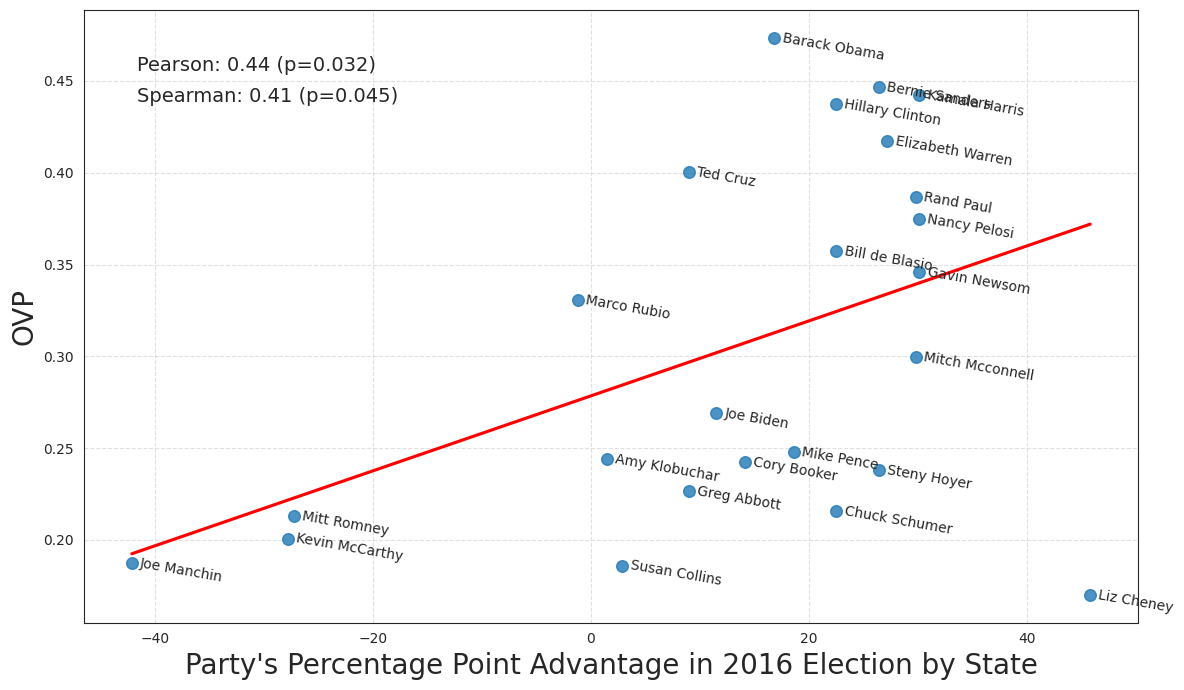

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Final_CSV_For_Analysis.csv')

news_center_affiliations = {
    'www.bbc.com': 'Democratic', 'www.nytimes.com': 'Democratic', 'www.huffpost.com': 'Democratic', 
    'www.washingtonpost.com': 'Democratic', 'www.wsj.com': 'Republican', 'www.cnn.com': 'Democratic', 
    'www.cbsnews.com': 'Democratic', 'www.latimes.com': 'Neutral', 'www.dailymail.co.uk': 'Republican', 
    'abcnews.go.com': 'Democratic', 'www.nbcnews.com': 'Democratic', 'www.foxnews.com': 'Republican', 
    'www.newsmax.com': 'Republican', 'www.usnews.com': 'Neutral', 'time.com': 'Democratic', 
    'www.reuters.com': 'Neutral', 'news.yahoo.com': 'Neutral', 'www.usatoday.com': 'Neutral', 
    'www.cnbc.com': 'Democratic', 'www.csmonitor.com': 'Neutral'
}

politician_affiliations = {
    'Joe Biden': 'Democratic', 'Donald Trump': 'Republican', 'Kamala Harris': 'Democratic', 
    'Mitch Mcconnell': 'Republican', 'Nancy Pelosi': 'Democratic', 'Mike Pence': 'Republican', 
    'Barack Obama': 'Democratic', 'Hillary Clinton': 'Democratic', 'Kevin McCarthy': 'Republican', 
    'Liz Cheney': 'Republican', 'Chuck Schumer': 'Democratic', 'Mitt Romney': 'Republican', 
    'Elizabeth Warren': 'Democratic', 'John Roberts': 'Republican', 'Bernie Sanders': 'Democratic', 
    'Joe Manchin': 'Democratic', 'Cory Booker': 'Democratic', 'Ted Cruz': 'Republican', 
    'Gavin Newsom': 'Democratic', 'Rand Paul': 'Republican', 'Marco Rubio': 'Republican', 
    'Amy Klobuchar': 'Democratic', 'Susan Collins': 'Republican', 'Bill de Blasio': 'Democratic', 
    'Janet Yellen': 'Democratic', 'Steny Hoyer': 'Democratic', 'Greg Abbott': 'Republican'
}

selected_news_centers = list(news_center_affiliations.keys())
df = df[df['News Center'].isin(selected_news_centers)]

mean_smile_effect = {
    'Politician': [],
    'Overall Polarization': []
}

for politician in politician_affiliations.keys():
    values = []
    for news_center in selected_news_centers:
        smile_column = f"Final_Ratio_{news_center}"
        if smile_column in df.columns:
            mean_effect = df[df['Political Person'] == politician][smile_column].mean()
            if not np.isnan(mean_effect):
                values.append(mean_effect)
    overall_std = np.std(values, ddof=0) if values else 0
    mean_smile_effect['Politician'].append(politician)
    mean_smile_effect['Overall Polarization'].append(overall_std)

mean_smile_effect_df = pd.DataFrame(mean_smile_effect)
mean_smile_effect_df = mean_smile_effect_df.sort_values(by='Overall Polarization', ascending=False)

import seaborn as sns
from scipy.stats import pearsonr, spearmanr

politician_vote_percentage = {
    'Joe Biden': 11.5, 'Donald Trump': np.nan, 'Kamala Harris': 30.1, 'Mitch Mcconnell': 29.8, 
    'Nancy Pelosi': 30.1, 'Mike Pence': 18.6, 'Barack Obama': 16.8, 'Hillary Clinton': 22.5, 
    'Kevin McCarthy': -27.8, 'Liz Cheney': 45.8, 'Chuck Schumer': 22.5, 'Mitt Romney': -27.2, 
    'Elizabeth Warren': 27.2, 'John Roberts': np.nan, 'Bernie Sanders': 26.4, 'Joe Manchin': -42.1, 
    'Cory Booker': 14.1, 'Ted Cruz': 9.0, 'Gavin Newsom': 30.1, 'Rand Paul': 29.8, 
    'Marco Rubio': -1.2, 'Amy Klobuchar': 1.5, 'Susan Collins': 2.9, 'Bill de Blasio': 22.5, 
    'Janet Yellen': np.nan, 'Steny Hoyer': 26.4, 'Greg Abbott': 9.0
}

mean_smile_effect_df['Vote Percentage'] = mean_smile_effect_df['Politician'].map(politician_vote_percentage)
mean_smile_effect_df = mean_smile_effect_df.dropna()

pearson_corr, pearson_pval = pearsonr(mean_smile_effect_df['Vote Percentage'], mean_smile_effect_df['Overall Polarization'])
spearman_corr, spearman_pval = spearmanr(mean_smile_effect_df['Vote Percentage'], mean_smile_effect_df['Overall Polarization'])

plt.figure(figsize=(12, 7))
sns.regplot(x='Vote Percentage', y='Overall Polarization', data=mean_smile_effect_df,
            scatter_kws={'s': 70}, line_kws={'color': 'red'}, ci=None)

for i, row in mean_smile_effect_df.iterrows():
    plt.annotate(row['Politician'], (row['Vote Percentage'], row['Overall Polarization']), fontsize=10,
                 xytext=(5,5), textcoords='offset points', va='top', ha='left', rotation=350)

plt.xlabel("Party's Percentage Point Advantage in 2016 Election by State", fontsize=20)
plt.ylabel("OVP", fontsize=20)
plt.annotate(f'Pearson: {pearson_corr:.2f} (p={pearson_pval:.3f})', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14)
plt.annotate(f'Spearman: {spearman_corr:.2f} (p={spearman_pval:.3f})', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
#plt.savefig('Fig_OVP_Vote.png', dpi=100)
plt.show()


### Figures A13, A14, A15:

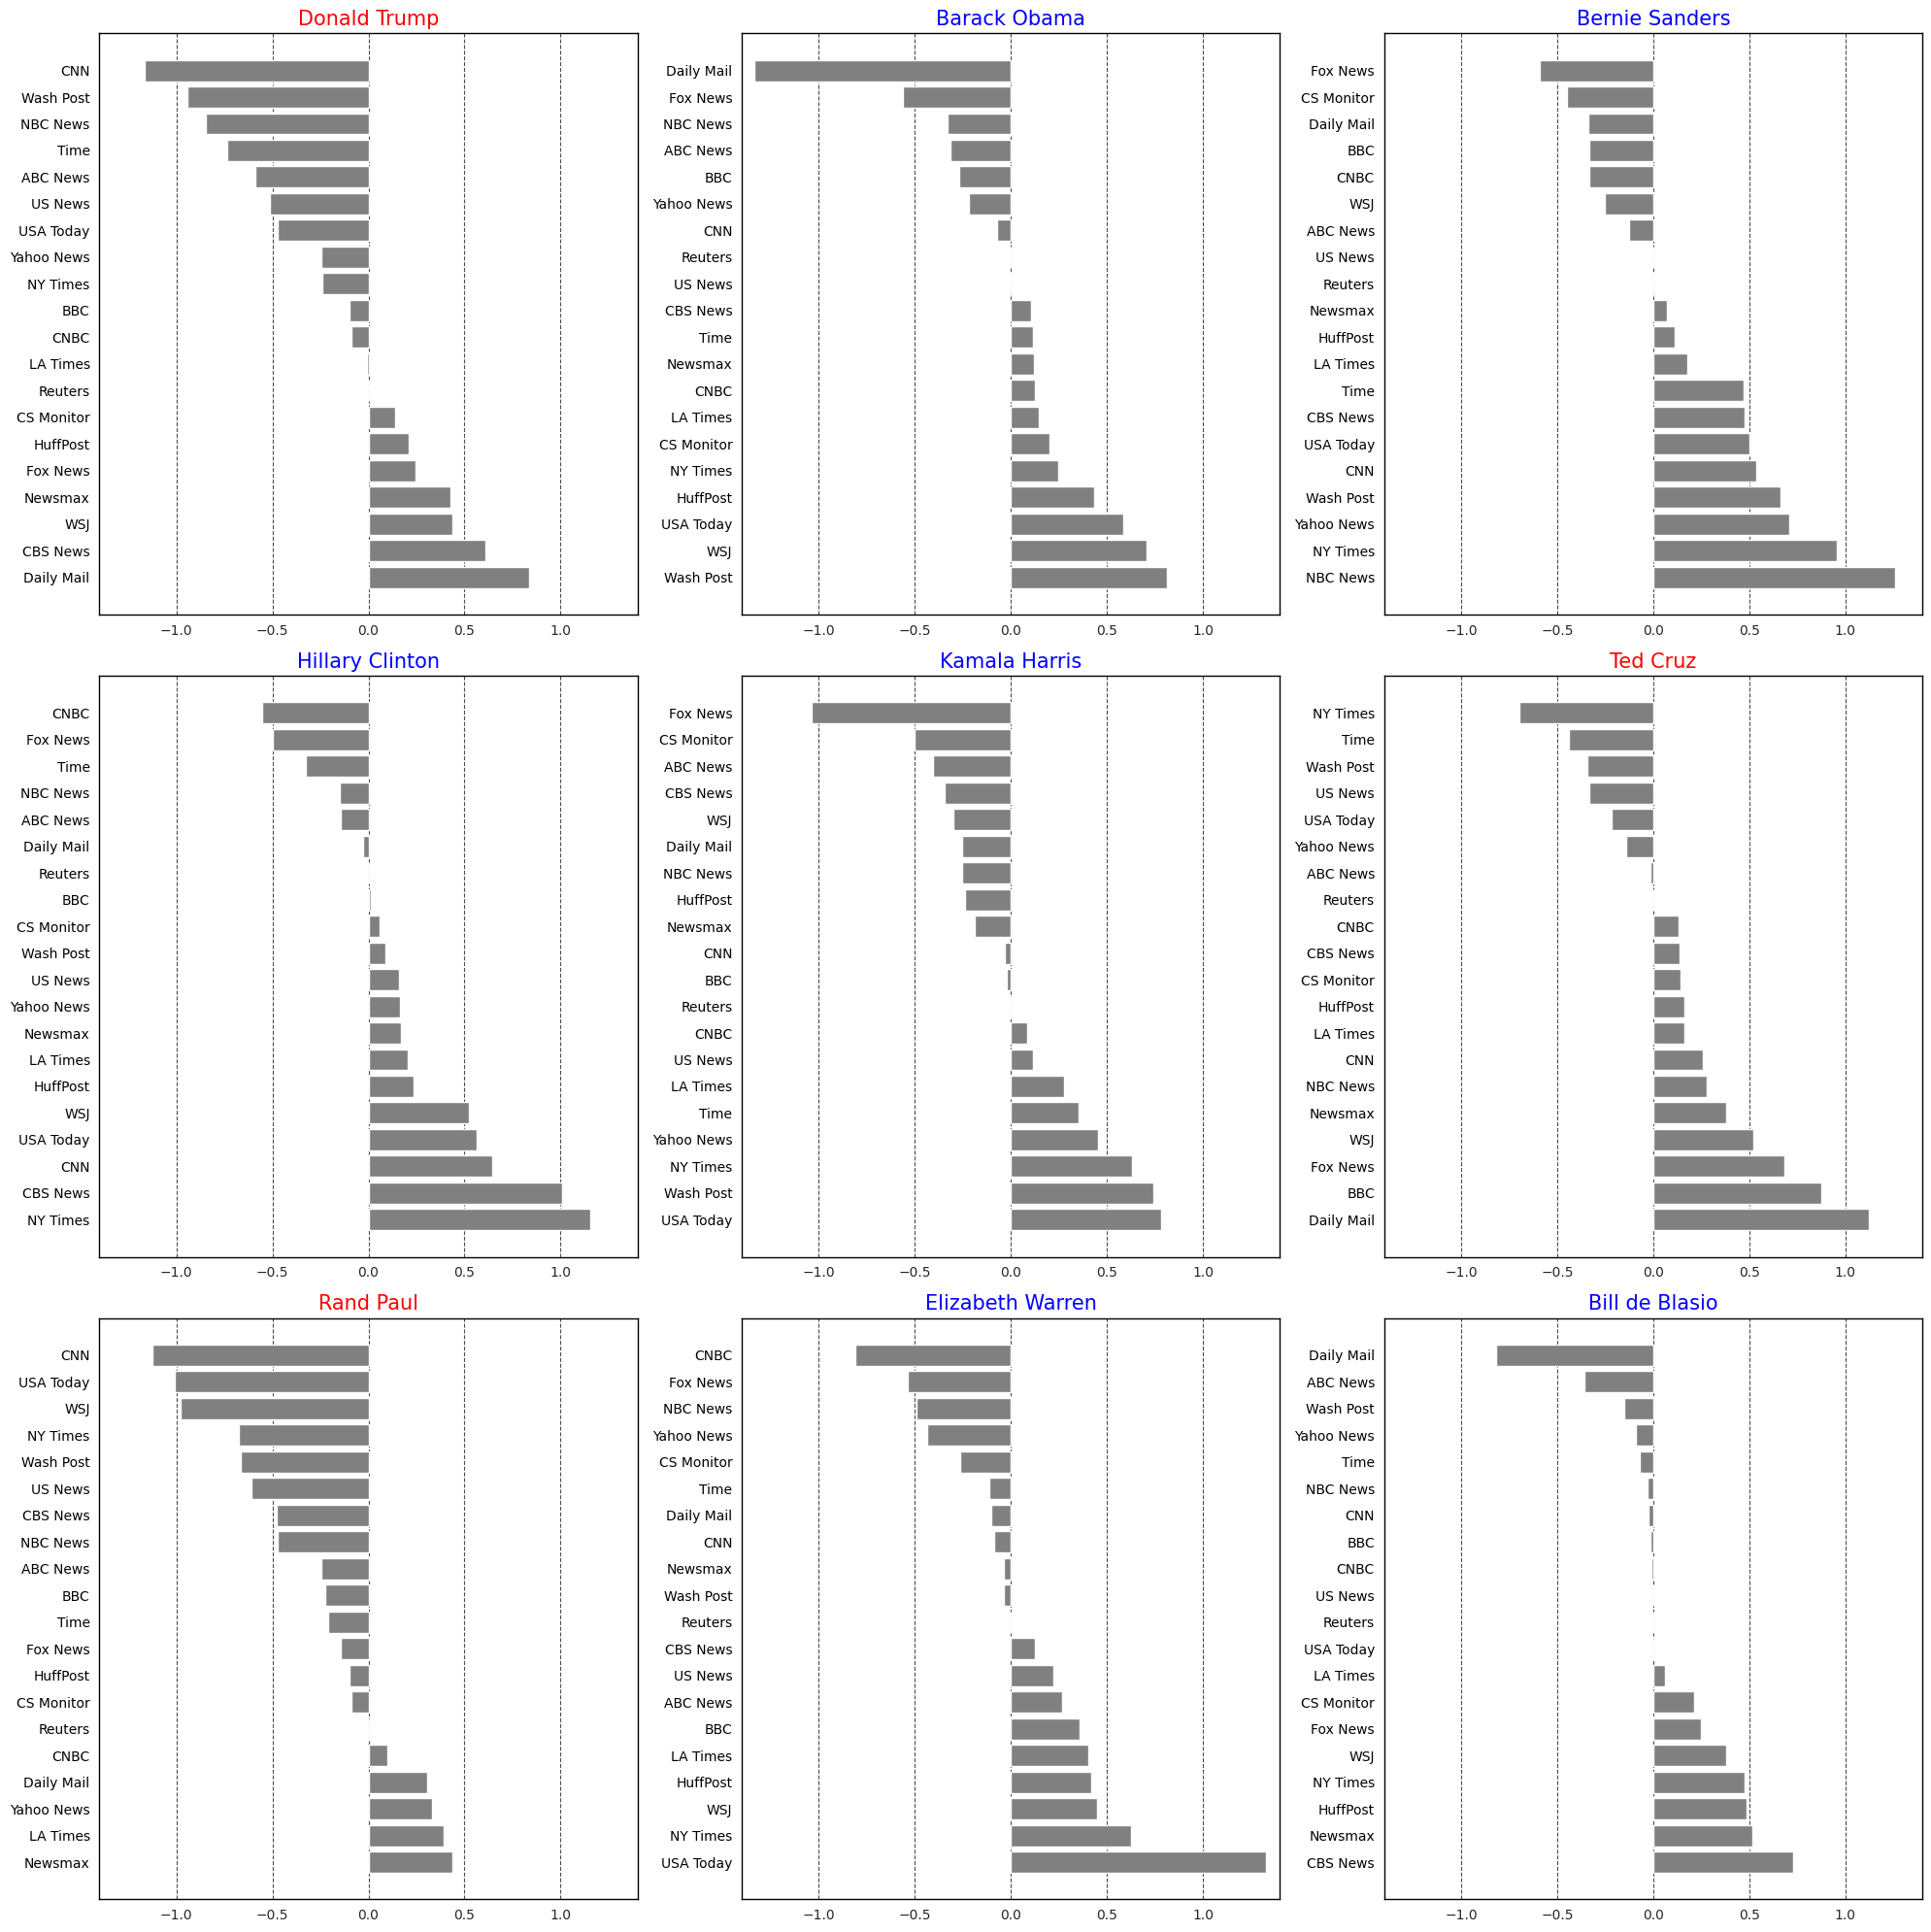

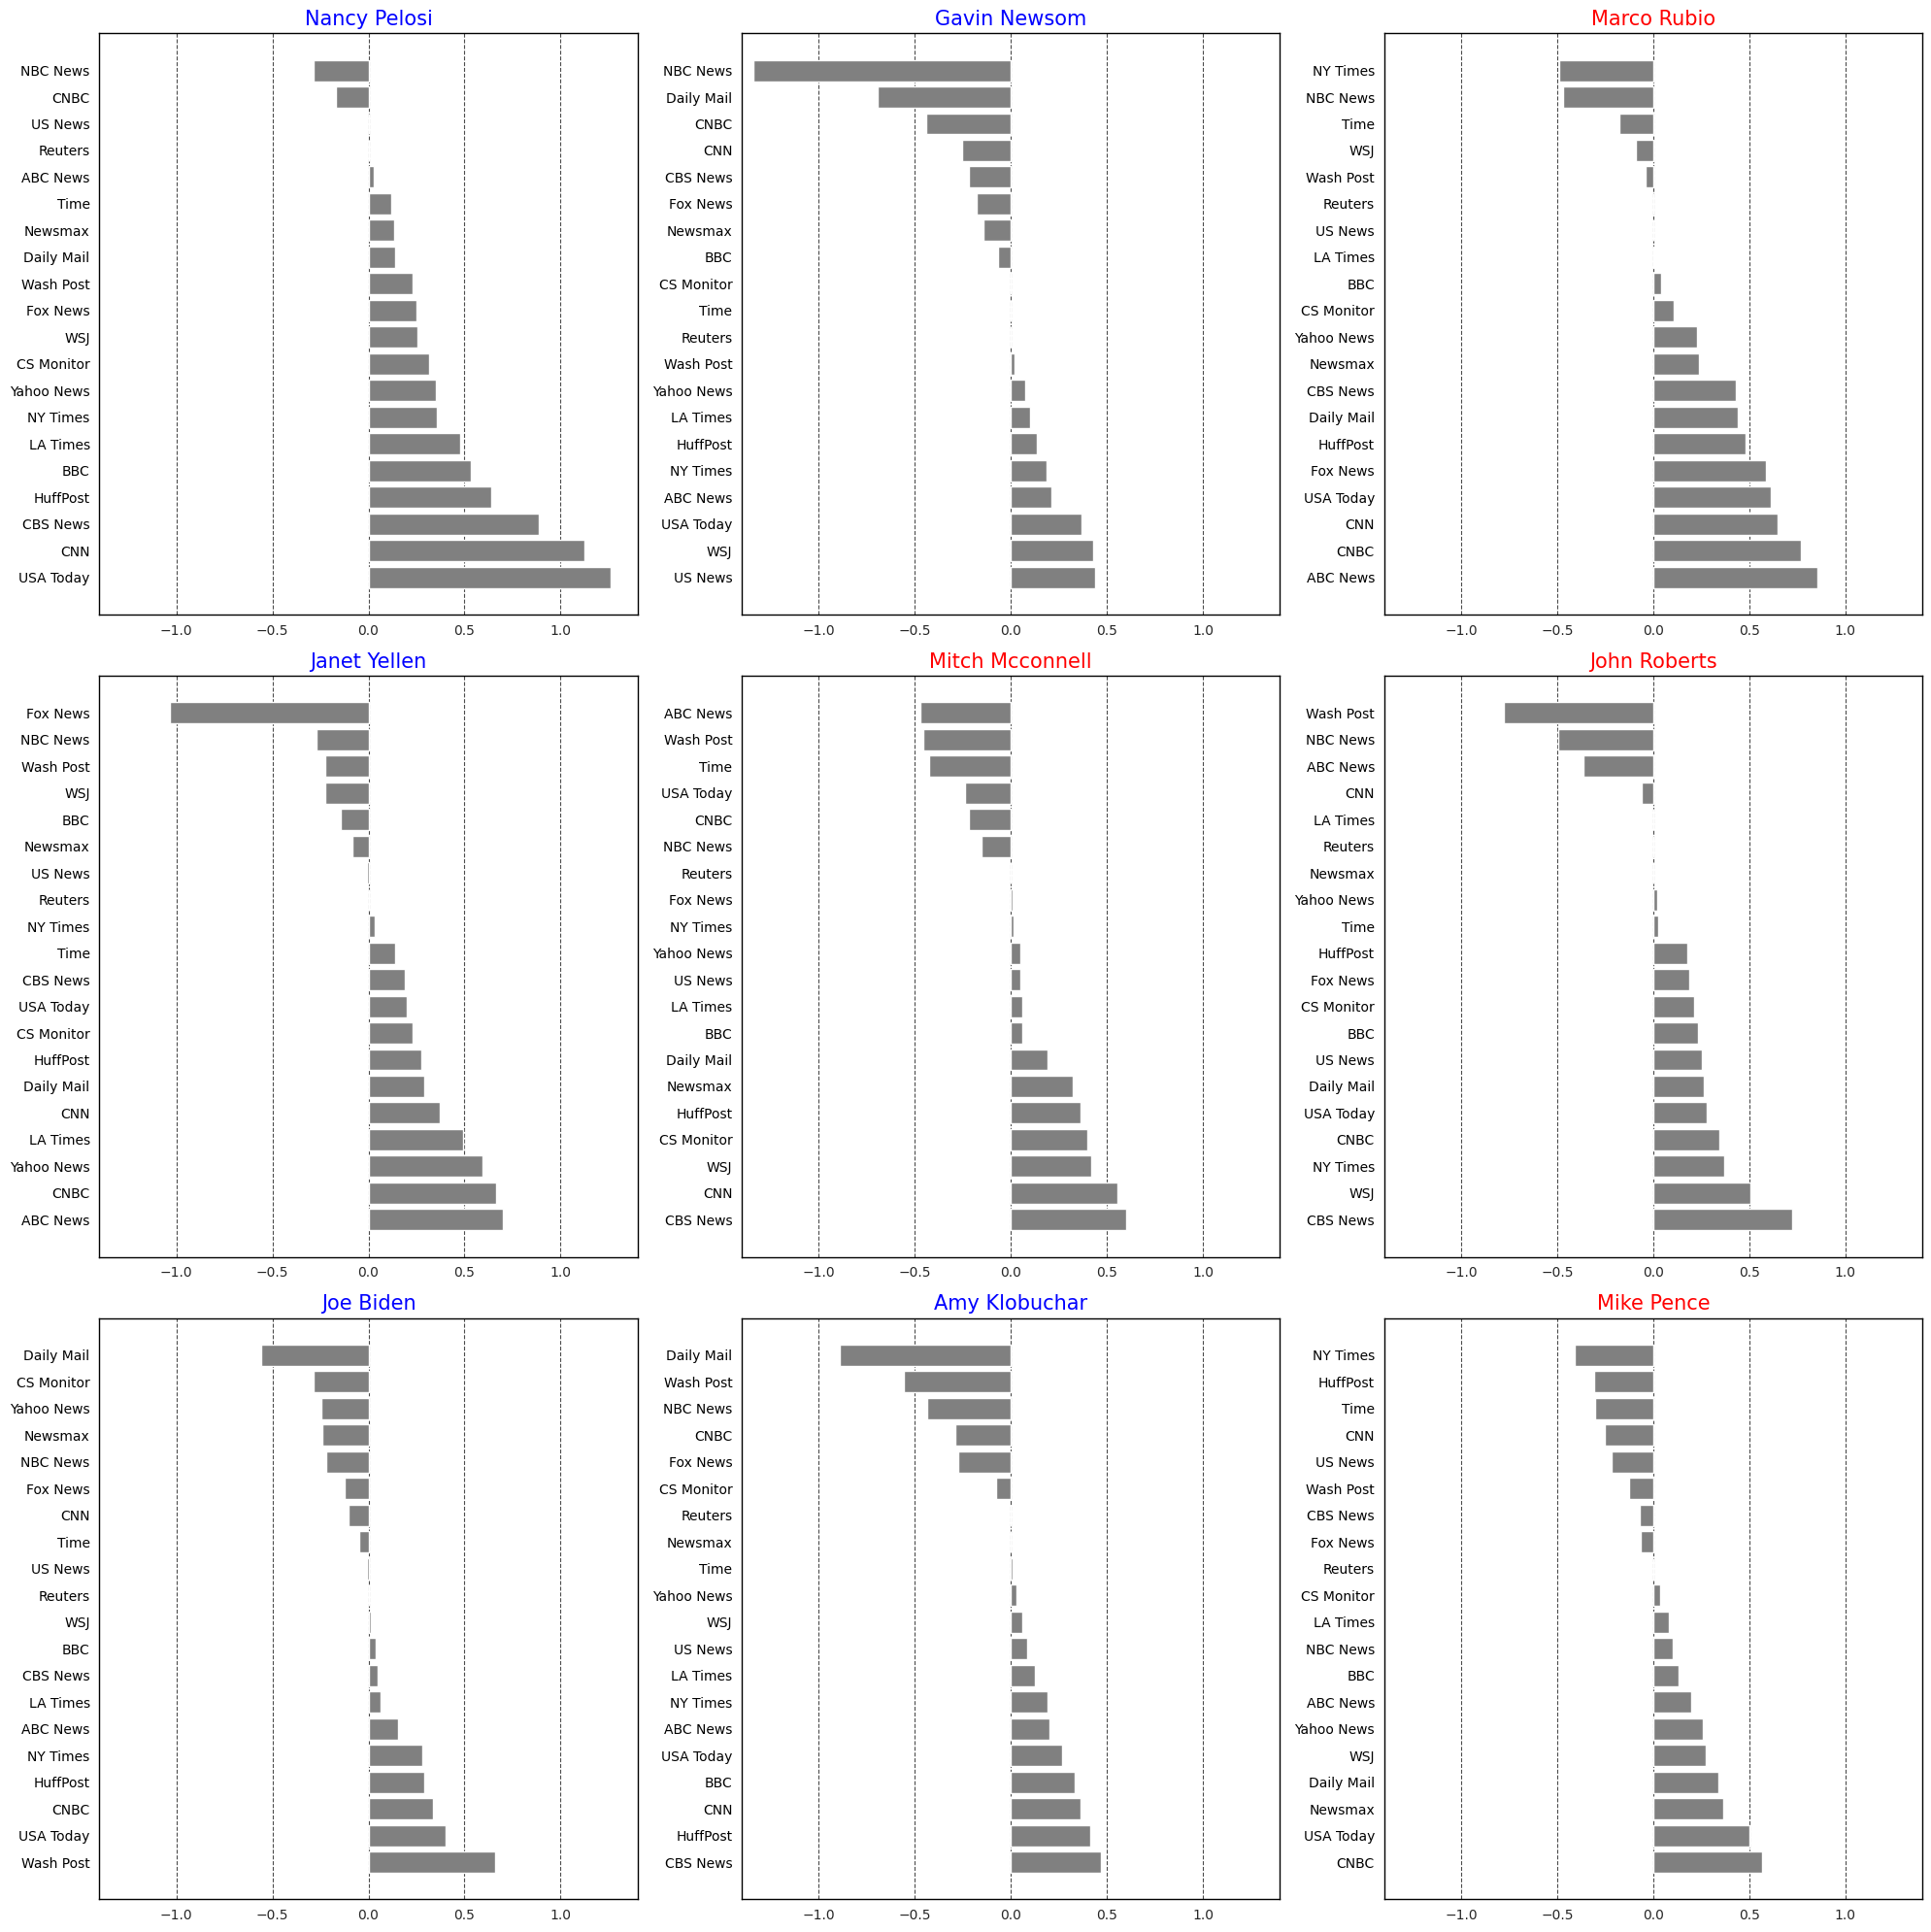

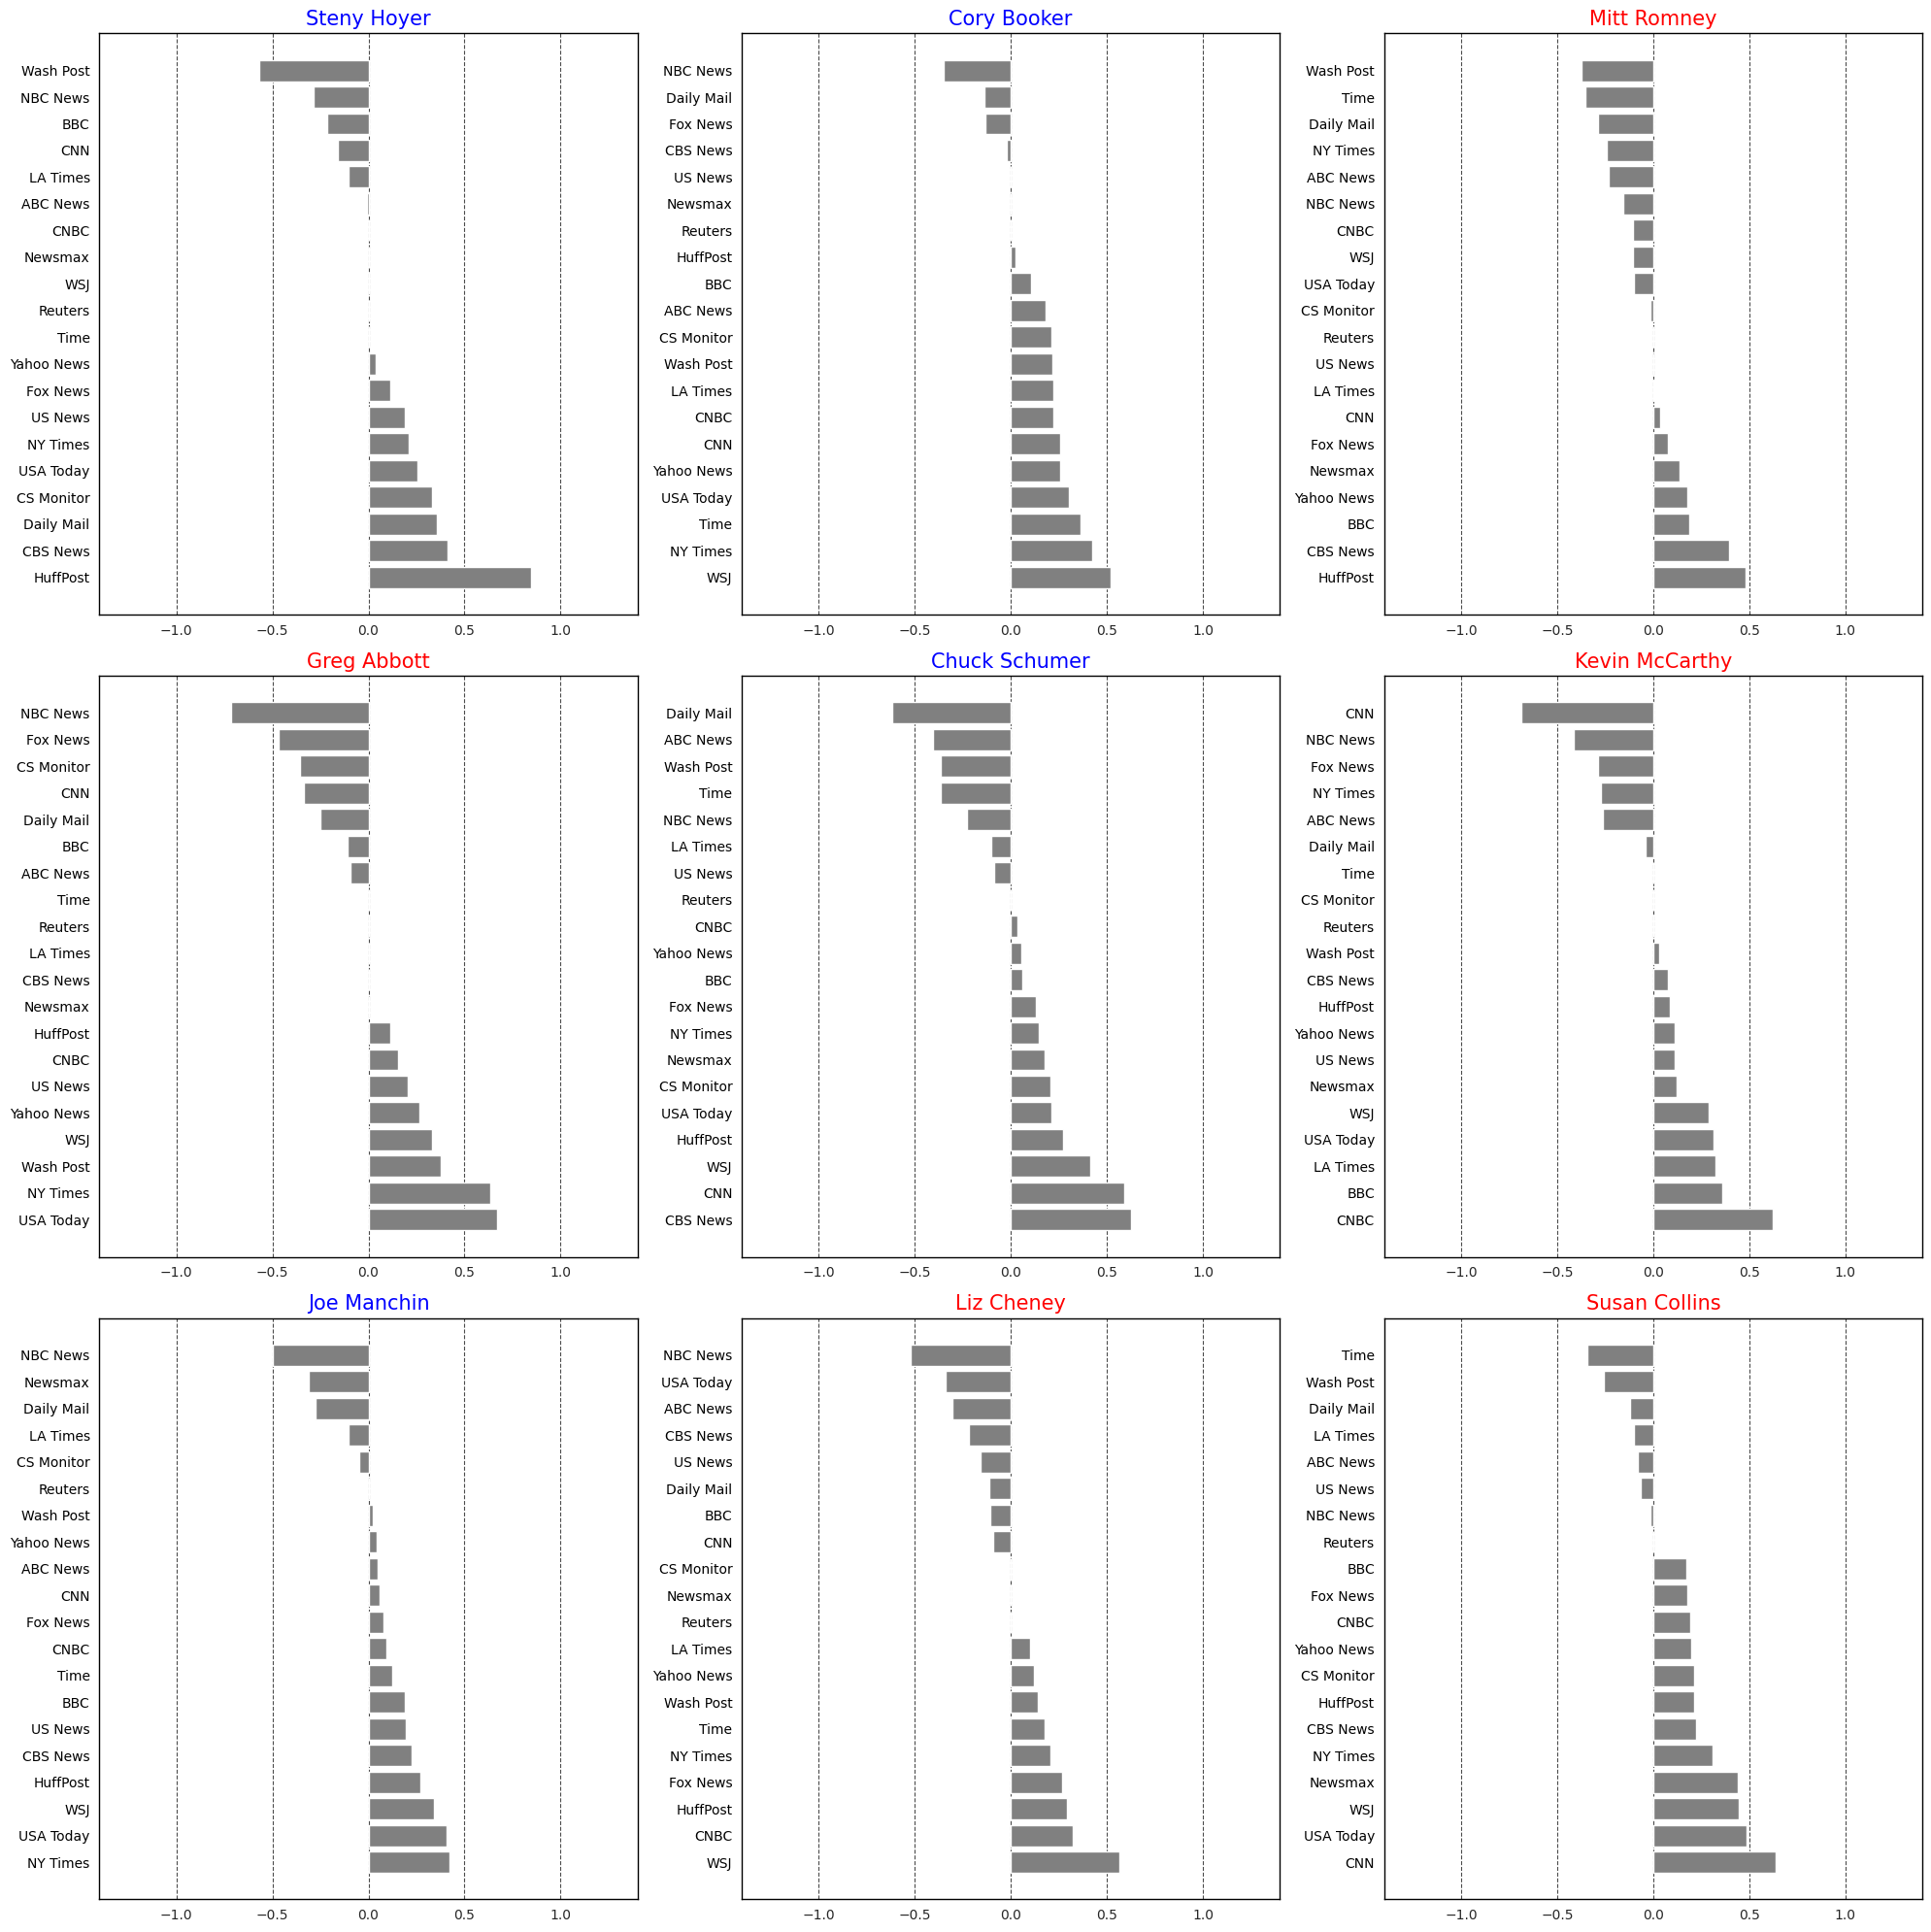

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Final_CSV_For_Analysis.csv').copy()

news_center_affiliations = {
    'www.bbc.com': 'Democratic', 'www.nytimes.com': 'Democratic', 'www.huffpost.com': 'Democratic',
    'www.washingtonpost.com': 'Democratic', 'www.wsj.com': 'Republican', 'www.cnn.com': 'Democratic',
    'www.cbsnews.com': 'Democratic', 'www.latimes.com': 'Democratic', 'www.dailymail.co.uk': 'Republican',
    'abcnews.go.com': 'Democratic', 'www.nbcnews.com': 'Democratic', 'www.foxnews.com': 'Republican',
    'www.newsmax.com': 'Republican', 'www.usnews.com': 'Neutral', 'time.com': 'Democratic',
    'www.reuters.com': 'Neutral', 'news.yahoo.com': 'Neutral', 'www.usatoday.com': 'Neutral',
    'www.cnbc.com': 'Democratic', 'www.csmonitor.com': 'Neutral'
}

short_names = {
    'www.bbc.com': 'BBC', 'www.nytimes.com': 'NY Times', 'www.huffpost.com': 'HuffPost',
    'www.washingtonpost.com': 'Wash Post', 'www.wsj.com': 'WSJ', 'www.cnn.com': 'CNN',
    'www.cbsnews.com': 'CBS News', 'www.latimes.com': 'LA Times', 'www.dailymail.co.uk': 'Daily Mail',
    'abcnews.go.com': 'ABC News', 'www.nbcnews.com': 'NBC News', 'www.foxnews.com': 'Fox News',
    'www.newsmax.com': 'Newsmax', 'www.usnews.com': 'US News', 'time.com': 'Time',
    'www.reuters.com': 'Reuters', 'news.yahoo.com': 'Yahoo News', 'www.usatoday.com': 'USA Today',
    'www.cnbc.com': 'CNBC', 'www.csmonitor.com': 'CS Monitor'
}

politician_affiliations = {
    'Donald Trump': 'Republican', 'Barack Obama': 'Democratic', 'Bernie Sanders': 'Democratic',
    'Hillary Clinton': 'Democratic', 'Kamala Harris': 'Democratic', 'Ted Cruz': 'Republican',
    'Rand Paul': 'Republican', 'Elizabeth Warren': 'Democratic', 'Bill de Blasio': 'Democratic',
    'Nancy Pelosi': 'Democratic', 'Gavin Newsom': 'Democratic', 'Marco Rubio': 'Republican',
    'Janet Yellen': 'Democratic', 'Mitch Mcconnell': 'Republican', 'John Roberts': 'Republican',
    'Joe Biden': 'Democratic', 'Amy Klobuchar': 'Democratic', 'Mike Pence': 'Republican',
    'Steny Hoyer': 'Democratic', 'Cory Booker': 'Democratic', 'Mitt Romney': 'Republican',
    'Greg Abbott': 'Republican', 'Chuck Schumer': 'Democratic', 'Kevin McCarthy': 'Republican',
    'Joe Manchin': 'Democratic', 'Liz Cheney': 'Republican', 'Susan Collins': 'Republican'
}

selected_news_centers = list(news_center_affiliations.keys())
df = df[df['News Center'].isin(selected_news_centers)]
politicians = list(politician_affiliations.keys())
df = df[df['Top1_Person'].isin(politicians)]

batch_size = 9
num_batches = len(politicians) // batch_size + (1 if len(politicians) % batch_size != 0 else 0)

for batch_num in range(num_batches):
    fig, axs = plt.subplots(3, 3, figsize=(20, 20))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    for idx in range(batch_size):
        politician_idx = batch_num * batch_size + idx
        if politician_idx >= len(politicians):
            break
        politician = politicians[politician_idx]
        row = idx // 3
        col = idx % 3
        ax = axs[row, col]
        mean_smile_effect = {'News Center': [], 'Smile Effect': []}
        ax.set_facecolor('white')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
        person_column = 'Political Person'
        for news_center in selected_news_centers:
            smile_column = f"Final_Ratio_{news_center}"
            if smile_column in df.columns:
                mean_effect = df[(df['News Center'] == news_center) & (df[person_column] == politician)][smile_column].mean()
                mean_smile_effect['News Center'].append(news_center)
                mean_smile_effect['Smile Effect'].append(mean_effect if not np.isnan(mean_effect) else 0)
        politician_mean = np.mean(mean_smile_effect['Smile Effect'])
        mean_smile_effect_df = pd.DataFrame(mean_smile_effect)
        mean_smile_effect_df.sort_values(by='Smile Effect', ascending=False, inplace=True)
        colors = ['gray' if val > 0 else 'gray' for val in mean_smile_effect_df['Smile Effect']]
        labels = [short_names[nc] for nc in mean_smile_effect_df['News Center']]
        ax.barh(labels, mean_smile_effect_df['Smile Effect'], color=colors)
        for tick_label in ax.get_yticklabels():
            news_center = tick_label.get_text()
            affiliation = news_center_affiliations.get(news_center, 'Neutral')
            color = 'blue' if affiliation == 'Democratic' else 'red' if affiliation == 'Republican' else 'black'
            tick_label.set_color(color)
        ax.grid(True, axis='x', linestyle='--', color='black', alpha=0.7)
        ax.set_xlim(-1.4, 1.4)
        title_color = 'red' if politician_affiliations[politician] == 'Republican' else 'blue'
        ax.set_title(f'{politician}', size=15, color=title_color)
    plt.tight_layout()
    plt.savefig(f'politician_smile_effect_bar_plots_batch_{batch_num + 1}.png', dpi=50)
    plt.show()


### Table A5:

In [59]:
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp, ttest_1samp

df = pd.read_csv('Final_CSV_For_Analysis.csv').copy()

news_center_affiliations = {
    'www.bbc.com': 'Neutral', 'www.nytimes.com': 'Democratic', 'www.huffpost.com': 'Democratic',
    'www.washingtonpost.com': 'Democratic', 'www.wsj.com': 'Republican', 'www.cnn.com': 'Democratic',
    'www.cbsnews.com': 'Democratic', 'www.latimes.com': 'Democratic', 'www.dailymail.co.uk': 'Republican',
    'abcnews.go.com': 'Democratic', 'www.nbcnews.com': 'Democratic', 'www.foxnews.com': 'Republican',
    'www.newsmax.com': 'Republican', 'www.usnews.com': 'Neutral', 'time.com': 'Democratic',
    'www.reuters.com': 'Neutral', 'news.yahoo.com': 'Neutral', 'www.usatoday.com': 'Neutral',
    'www.cnbc.com': 'Democratic', 'www.csmonitor.com': 'Neutral'
}

person_affiliations = {
    'Joe Biden': 'Democratic', 'Donald Trump': 'Republican', 'Kamala Harris': 'Democratic', 
    'Mitch Mcconnell': 'Republican', 'Nancy Pelosi': 'Democratic', 'Mike Pence': 'Republican', 
    'Barack Obama': 'Democratic', 'Hillary Clinton': 'Democratic', 'Kevin McCarthy': 'Republican', 
    'Liz Cheney': 'Republican', 'Chuck Schumer': 'Democratic', 'Hal Rogers': 'Republican', 
    'Mitt Romney': 'Republican', 'Elizabeth Warren': 'Democratic', 'John Roberts': 'Republican', 
    'Bernie Sanders': 'Democratic', 'Joe Manchin': 'Democratic', 'Cory Booker': 'Democratic', 
    'Ted Cruz': 'Republican', 'Gavin Newsom': 'Democratic', 'Rand Paul': 'Republican', 
    'Marco Rubio': 'Republican', 'Amy Klobuchar': 'Democratic', 'Susan Collins': 'Republican', 
    'Bill de Blasio': 'Democratic', 'Janet Yellen': 'Democratic', 'Steny Hoyer': 'Democratic', 
    'James Clyburn': 'Democratic', 'Randy Biggs': 'Republican', 'Greg Abbott': 'Republican'
}

selected_news_centers = [news for news, affiliation in news_center_affiliations.items() if affiliation in ['Democratic', 'Republican', 'Neutral']]
df = df[df['News Center'].isin(selected_news_centers)]

results = pd.DataFrame(columns=['News Center', 'Politician Side', 'Mean', 'Q1', 'Q3', 'K-S Statistic', 'K-S P-Value', 'T-Test Statistic', 'T-Test P-Value', 'Significant Difference', 'Support (n)'])

for news_center in selected_news_centers:
    smile_column = f"Final_Ratio_{news_center}"
    
    if smile_column not in df.columns:
        continue
    
    df_news_center = df[df['News Center'] == news_center]
    df_news_center = df

    democratic_politicians = df_news_center[df_news_center['Real Person Side'] == 'Democratic'][smile_column]
    republican_politicians = df_news_center[df_news_center['Real Person Side'] == 'Republican'][smile_column]
    
    if democratic_politicians.empty and republican_politicians.empty:
        continue  

    if not democratic_politicians.empty:
        democratic_mean = democratic_politicians.mean()
        democratic_q1 = democratic_politicians.quantile(0.1)
        democratic_q3 = democratic_politicians.quantile(0.9)
        n_democratic = len(democratic_politicians)
        t_stat, t_p_value = ttest_1samp(democratic_politicians, 0)
        significant_difference = t_p_value < 0.05
        results = pd.concat([results, pd.DataFrame({
            'News Center': [news_center],
            'Politician Side': ['Democratic'],
            'Mean': [democratic_mean],
            'Q1': [democratic_q1],
            'Q3': [democratic_q3],
            'K-S Statistic': [None],
            'K-S P-Value': [None],
            'T-Test Statistic': [t_stat],
            'T-Test P-Value': [t_p_value],
            'Significant Difference': [significant_difference],
            'Support (n)': [n_democratic]
        })], ignore_index=True)
        
    if not republican_politicians.empty:
        republican_mean = republican_politicians.mean()
        republican_q1 = republican_politicians.quantile(0.1)
        republican_q3 = republican_politicians.quantile(0.9)
        n_republican = len(republican_politicians)
        t_stat, t_p_value = ttest_1samp(republican_politicians, 0)
        significant_difference = t_p_value < 0.05
        results = pd.concat([results, pd.DataFrame({
            'News Center': [news_center],
            'Politician Side': ['Republican'],
            'Mean': [republican_mean],
            'Q1': [republican_q1],
            'Q3': [republican_q3],
            'K-S Statistic': [None],
            'K-S P-Value': [None],
            'T-Test Statistic': [t_stat],
            'T-Test P-Value': [t_p_value],
            'Significant Difference': [significant_difference],
            'Support (n)': [n_republican]
        })], ignore_index=True)
        
    if not democratic_politicians.empty and not republican_politicians.empty:
        ks_stat, ks_p_value = ks_2samp(democratic_politicians, republican_politicians)
        results.loc[(results['News Center'] == news_center) & (results['Politician Side'] == 'Democratic'), ['K-S Statistic', 'K-S P-Value']] = [ks_stat, ks_p_value]
        results.loc[(results['News Center'] == news_center) & (results['Politician Side'] == 'Republican'), ['K-S Statistic', 'K-S P-Value']] = [ks_stat, ks_p_value]

results


/tmp/ipykernel_1646180/2388625360.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


News Center Politician Side      Mean        Q1        Q3  \
0              www.bbc.com      Democratic  0.118436 -0.319761  1.387262   
1              www.bbc.com      Republican  0.074393 -0.107400  1.412719   
2          www.nytimes.com      Democratic  0.511491  0.196832  1.255728   
3          www.nytimes.com      Republican -0.358410 -0.910759  0.139576   
4         www.huffpost.com      Democratic  0.347100 -0.075307  0.774228   
5         www.huffpost.com      Republican  0.163345 -0.189236  0.479133   
6   www.washingtonpost.com      Democratic  0.457621 -0.139989  1.050068   
7   www.washingtonpost.com      Republican -0.623753 -1.131657  0.337432   
8              www.wsj.com      Democratic  0.247083 -0.421197  0.782926   
9              www.wsj.com      Republican  0.174797 -0.482829  0.766265   
10             www.cnn.com      Democratic  0.303806 -0.262487  0.824381   
11             www.cnn.com      Republican -0.414532 -1.217383  1.147554   
12         www.cbsnews.com      Democratic  0.284997 -0.410532  1.114301   
13         www.cbsnews.com      Republican  0.327852 -0.290410  0.730443   
14         www.latimes.com      Democratic  0.229354 -0.111570  0.571023   
15         www.latimes.com      Republican  0.040731 -0.102548  0.558625   
16     www.dailymail.co.uk      Democratic -0.517401 -1.405576  0.338210   
17     www.dailymail.co.uk      Republican  0.623102  0.001788  0.904089   
18          abcnews.go.com      Democratic  0.036367 -0.484612  0.762542   
19          abcnews.go.com      Republican -0.309253 -0.813717  0.338920   
20         www.nbcnews.com      Democratic -0.129287 -0.722960  0.231620   
21         www.nbcnews.com      Republican -0.406695 -1.050069  0.604155   
22         www.foxnews.com      Democratic -0.475364 -1.133855  0.368778   
23         www.foxnews.com      Republican  0.284748 -0.351001  0.874859   
24         www.newsmax.com      Democratic -0.154716 -0.446576  0.284202   
25         www.newsmax.com      Republican  0.440140  0.212352  0.740498   
26          www.usnews.com      Democratic  0.169039  0.021324  0.441061   
27          www.usnews.com      Republican -0.274160 -0.557297  0.203167   
28                time.com      Democratic  0.068727 -0.364889  0.657417   
29                time.com      Republican -0.367946 -0.736794  0.319071   
30         www.reuters.com      Democratic  0.000000  0.000000  0.000000   
31         www.reuters.com      Republican  0.000000  0.000000  0.000000   
32          news.yahoo.com      Democratic  0.164972 -0.332501  0.729542   
33          news.yahoo.com      Republican  0.058402 -0.242634  0.577369   
34        www.usatoday.com      Democratic  0.684882  0.288809  1.377122   
35        www.usatoday.com      Republican -0.227559 -0.507893  0.807626   
36            www.cnbc.com      Democratic -0.100028 -0.823698  0.417308   
37            www.cnbc.com      Republican  0.147019 -0.233187  0.988801   
38       www.csmonitor.com      Democratic -0.111951 -0.666399  0.251473   
39       www.csmonitor.com      Republican  0.135084 -0.340083  0.726346   

   K-S Statistic K-S P-Value  T-Test Statistic  T-Test P-Value  \
0       0.298602         0.0         12.669567    2.921595e-36   
1       0.298602         0.0          7.411442    1.504966e-13   
2       0.858508         0.0         86.313968    0.000000e+00   
3       0.858508         0.0        -61.043792    0.000000e+00   
4       0.521243         0.0         92.212817    0.000000e+00   
5       0.521243         0.0         43.207272    0.000000e+00   
6       0.706853         0.0         55.422311    0.000000e+00   
7       0.706853         0.0        -62.399144    0.000000e+00   
8       0.289968         0.0         31.674891   9.011783e-202   
9       0.289968         0.0         17.675596    1.786380e-67   
10      0.537113         0.0         36.818225   2.194325e-264   
11      0.537113         0.0        -28.119786   1.938296e-159   
12      0.341284         0.0         34.

### Figure A6:

/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

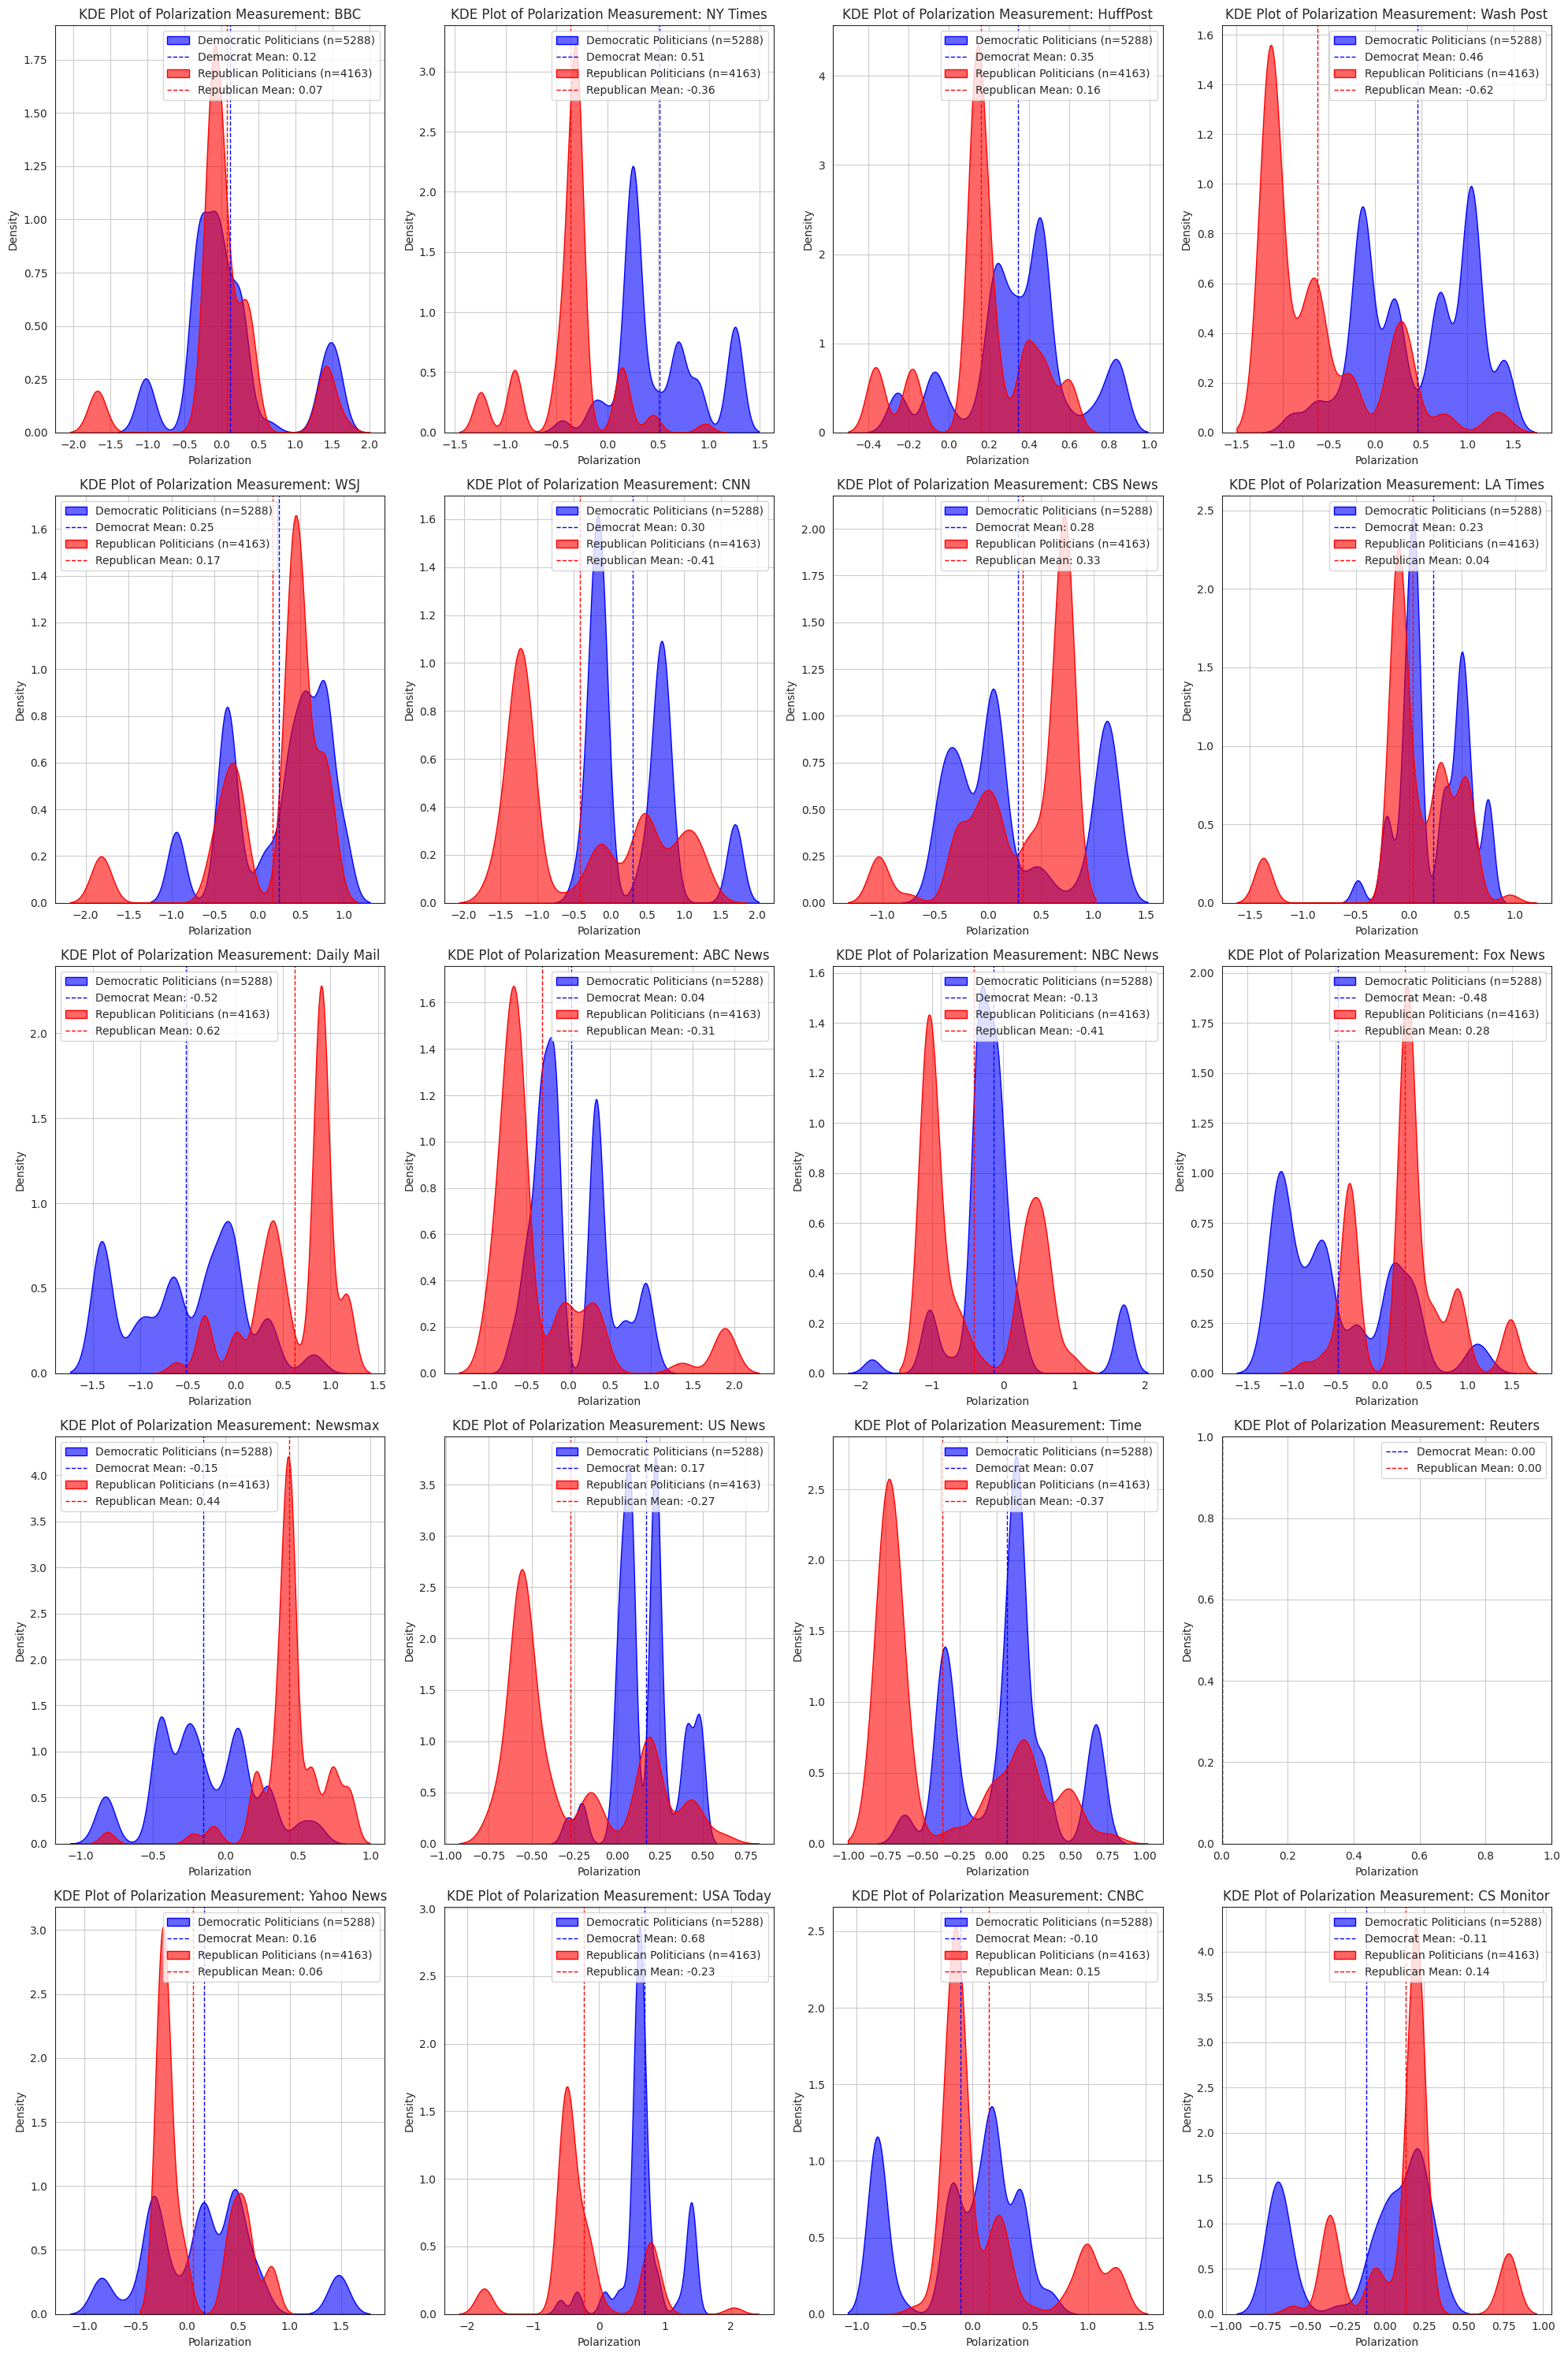

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Final_CSV_For_Analysis.csv').copy()

news_center_affiliations = {
    'www.bbc.com': 'Neutral', 'www.nytimes.com': 'Democratic', 'www.huffpost.com': 'Democratic', 
    'www.washingtonpost.com': 'Democratic', 'www.wsj.com': 'Republican', 'www.cnn.com': 'Democratic', 
    'www.cbsnews.com': 'Democratic', 'www.latimes.com': 'Democratic', 'www.dailymail.co.uk': 'Republican', 
    'abcnews.go.com': 'Democratic', 'www.nbcnews.com': 'Democratic', 'www.foxnews.com': 'Republican', 
    'www.newsmax.com': 'Republican', 'www.usnews.com': 'Neutral', 'time.com': 'Democratic', 
    'www.reuters.com': 'Neutral', 'news.yahoo.com': 'Neutral', 'www.usatoday.com': 'Neutral', 
    'www.cnbc.com': 'Democratic', 'www.csmonitor.com': 'Neutral'
}

short_names = {
    'www.bbc.com': 'BBC', 'www.nytimes.com': 'NY Times', 'www.huffpost.com': 'HuffPost', 
    'www.washingtonpost.com': 'Wash Post', 'www.wsj.com': 'WSJ', 'www.cnn.com': 'CNN', 
    'www.cbsnews.com': 'CBS News', 'www.latimes.com': 'LA Times', 'www.dailymail.co.uk': 'Daily Mail', 
    'abcnews.go.com': 'ABC News', 'www.nbcnews.com': 'NBC News', 'www.foxnews.com': 'Fox News', 
    'www.newsmax.com': 'Newsmax', 'www.usnews.com': 'US News', 'time.com': 'Time', 
    'www.reuters.com': 'Reuters', 'news.yahoo.com': 'Yahoo News', 'www.usatoday.com': 'USA Today', 
    'www.cnbc.com': 'CNBC', 'www.csmonitor.com': 'CS Monitor'
}

person_affiliations = {
    'Joe Biden': 'Democratic', 'Donald Trump': 'Republican', 'Kamala Harris': 'Democratic', 
    'Mitch Mcconnell': 'Republican', 'Nancy Pelosi': 'Democratic', 'Mike Pence': 'Republican', 
    'Barack Obama': 'Democratic', 'Hillary Clinton': 'Democratic', 'Kevin McCarthy': 'Republican', 
    'Liz Cheney': 'Republican', 'Chuck Schumer': 'Democratic', 'Hal Rogers': 'Republican', 
    'Mitt Romney': 'Republican', 'Elizabeth Warren': 'Democratic', 'John Roberts': 'Republican', 
    'Bernie Sanders': 'Democratic', 'Joe Manchin': 'Democratic', 'Cory Booker': 'Democratic', 
    'Ted Cruz': 'Republican', 'Gavin Newsom': 'Democratic', 'Rand Paul': 'Republican', 
    'Marco Rubio': 'Republican', 'Amy Klobuchar': 'Democratic', 'Susan Collins': 'Republican', 
    'Bill de Blasio': 'Democratic', 'Janet Yellen': 'Democratic', 'Steny Hoyer': 'Democratic', 
    'James Clyburn': 'Democratic', 'Randy Biggs': 'Republican', 'Greg Abbott': 'Republican'
}

selected_news_centers = [news for news, affiliation in news_center_affiliations.items() if affiliation in ['Democratic', 'Republican', 'Neutral']]
df = df[df['News Center'].isin(selected_news_centers)]

num_news_centers = len(selected_news_centers)
num_cols = 4
num_rows = (num_news_centers + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
axes = axes.flatten()

for i, news_center in enumerate(selected_news_centers):
    smile_column = f"Final_Ratio_{news_center}"
    if smile_column not in df.columns:
        continue
    
    df_news_center = df[df['News Center'] == news_center]
    df_news_center = df
    
    democratic_politicians = df_news_center[df_news_center['Real Person Side'] == 'Democratic'][smile_column]
    republican_politicians = df_news_center[df_news_center['Real Person Side'] == 'Republican'][smile_column]
    
    if democratic_politicians.empty and republican_politicians.empty:
        continue

    ax = axes[i]
    sns.kdeplot(democratic_politicians, color='blue', label=f'Democratic Politicians (n={len(democratic_politicians)})', fill=True, alpha=0.6, ax=ax)
    
    if not democratic_politicians.empty:
        democratic_mean = democratic_politicians.mean()
        ax.axvline(democratic_mean, color='blue', linestyle='dashed', linewidth=1, label=f'Democrat Mean: {democratic_mean:.2f}')
    
    sns.kdeplot(republican_politicians, color='red', label=f'Republican Politicians (n={len(republican_politicians)})', fill=True, alpha=0.6, ax=ax)
    
    if not republican_politicians.empty:
        republican_mean = republican_politicians.mean()
        ax.axvline(republican_mean, color='red', linestyle='dashed', linewidth=1, label=f'Republican Mean: {republican_mean:.2f}')
    
    ax.set_title(f'KDE Plot of Polarization Measurement: {short_names[news_center]}')
    ax.set_xlabel('Polarization')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.savefig('histograms_3xN_layout.png', dpi=70)
plt.show()
